<h1> <center> Term Deposit Subscription Prediction

<p align="center">
  <img src="https://genhq.com/wp-content/uploads/2018/09/GenZBanking2Final.gif" alt="animated" />
</p>

Gif Credit:  [CGK](https://genhq.com/gen-z-uses-banks-differently/)

# Content Overview

1.   Dataset Overview

2.   Problem Statement

3.   Methodology

4.   Import Libraries

5.   Load Dataset

6.   EDA

7.   Data preprocessing

8.   Auto ML

9.   Mannual ML

10.   Test Data Prediction and pipeline

# 1. Dataset Overview

**A. Bank Client Data**

   1.Age represents the age of their customers.


   2.Job type represents the tye of job like white collar,technician etc.


   3.Merital Status represents the staus of marital.


   4.Default represents whether customer has credit default or not.


   5.Balance represents average yearly balance, in euros.


   6.Housing represents whether customer has housing loan or not.


   7.Loan represents whether customer has personal loan or not.



**Variables related with the last contact of the current campaign**

   1.Contact represents contact communication type.


   2.Day represents last contact day of the month.


   3.Month represents last contact month of year.


   4.Duration represents last contact duration, in seconds.



**Other Attributes**

   1.Campaign represents number of contacts performed during this campaign and for this client.


   2.Pdays represents number of days that passed by after the client was last contacted from a previous campaign.


   3.Previous represents number of contacts performed before this campaign and  for this client.


   4.Poutcome represents outcome of the previous marketing campaign.




**Output variable (desired target)**




   1.y - has the client subscribed a term deposit like 'Yes' or 'No'



# 2. Problem Statement

It is very cumbersome to get business from a new customer as compared to an old customer.Therefore,a lot of human effort and resources are spent by the banks to attract new customer, but still, the banks were not sure whether the customer will show their faith on them.Therefore it is wise to focus on our pre-existing as well as new customer base and come up with a new model/strategy in such a way that term deposit increases drastically and its operational cost for target audience decreases.

# 3. Methodology

***Step 1***.Understanding the problem statement.

***Step 2***.Overview of features.

***Step 3***.Performed Exploratory Data Analysis under which Univariate,Bivariate and Statiscal analysis has been done as well as Auto EDA through ***dtale*** library.

***Step 4***.Data Pre-Processing,in three ways like formtaion of manual groupings,groups of quantile binning,detailed Feature Engineering and Outlier Treatment.

***Step 5*** Normalization,Encoding and checking for multi-collinearity.

***Step 6*** Treatement of Imbalanced Dataset by SMOTE.

***Step 7*** Feature Importance by tree classifier,permutation method.

***Step 8*** Dropping of correlated,constant and duplicates.

***Step 9*** Splitting the dataset in train-test in ratio 75:25.

***Step 10*** Model fitting.Used best 5 algorithms like Random Forest,Logistic Regression etc.

***Step 11*** Performed Hypperparameter Optimation.

***Step 12*** Created Pipeline through which test data has been validated.


# 4. Import Libraries

## PIP install

In [ ]:
!pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import clear_output
!pip install -U --pre pycaret
clear_output()

## Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import requests
from pycaret.classification import setup, compare_models, pull, finalize_model, blend_models, predict_model, models, plot_model
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
import math
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)
from sklearn.ensemble import ExtraTreesClassifier
import dtale
from statsmodels.graphics.gofplots import qqplot
import dtale.app as dtale_app 
from scipy.stats import norm
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
import missingno as mso
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import f_oneway

# 5. Load Dataset

In [ ]:
# Load the dataset mannualy

# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
# submission = pd.read_csv("submission.csv")

In [ ]:
# No need to dowload datasets separately
# run these code to extract data from github
# this are the datasets provided by ecolab

gt_train_url = "https://raw.githubusercontent.com/VaibhavArora13/Ecolab-Assessment/main/train.csv"
gt_test_url = "https://raw.githubusercontent.com/VaibhavArora13/Ecolab-Assessment/main/test.csv"
gt_submission_url = "https://raw.githubusercontent.com/VaibhavArora13/Ecolab-Assessment/main/submission.csv"
download_train = requests.get(gt_train_url).content
download_test = requests.get(gt_test_url).content
download_submission = requests.get(gt_submission_url).content
train = pd.read_csv(io.StringIO(download_train.decode('utf-8')))
test = pd.read_csv(io.StringIO(download_test.decode('utf-8')))
submission = pd.read_csv(io.StringIO(download_submission.decode('utf-8')))

In [ ]:
print("\033[1m" + "Train Data" + "\033[0m")
train.head()

Train Data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [ ]:
print("\033[1m" + "Test Data" + "\033[0m")
test.head()

Test Data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other


# 6. EDA

## 6.1 Automated EDA By dtale Library

**How to use this automated EDA**

> First Click on this link : ![picture](https://drive.google.com/uc?export=view&id=1Q_CDIE9zXSwdy7SK7CWm0oeC0b18oJL7)


> then click on any operation you want to use in that it will open new tab for the same : ![picture](https://drive.google.com/uc?export=view&id=12AUr1BJYoYy1vx5DG31CAk46z2IP5Tsw)

In [ ]:
dtale_app.USE_COLAB = True

### Train Dataset

In [ ]:
dtale.show(train)

https://7y9uoligz9m-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/3

### Test Dataset

In [ ]:
dtale.show(test)

https://7y9uoligz9m-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/4

## 6.2 Mannual EDA

### 6.2.1 Inspecting Dataframe Structure

#### 6.2.1.1 Structure Size

In [ ]:
print("\033[1m" + "Train Shape" + "\033[0m" ,': Rows: {} Columns: {}'.format(train.shape[0], train.shape[1]))
print("\n")
print("\033[1m" + "Test Shape" + "\033[0m" ,': Rows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Train Shape : Rows: 33908 Columns: 17


Test Shape : Rows: 11303 Columns: 16


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11303 non-null  int64 
 1   job        11303 non-null  object
 2   marital    11303 non-null  object
 3   education  11303 non-null  object
 4   default    11303 non-null  object
 5   balance    11303 non-null  int64 
 6   housing    11303 non-null  object
 7   loan       11303 non-null  object
 8   contact    11303 non-null  object
 9   day        11303 non-null  int64 
 10  month      11303 non-null  object
 11  duration   11303 non-null  int64 
 12  campaign   11303 non-null  int64 
 13  pdays      11303 non-null  int64 
 14  previous   11303 non-null  int64 
 15  poutcome   11303 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


Insight: From the above numbers we can see 1 extra column present in training data compared to Test data which is Target Variable

#### 6.2.1.2 Datatypes 

In [ ]:
print("\033[1m" + "Train Datatype" + "\033[0m")
train.dtypes

Train Datatype


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Value counts of train datatypes
pd.value_counts(train.dtypes)

object    10
int64      7
dtype: int64

In [ ]:
print("\033[1m" + "Test Datatype" + "\033[0m")
test.dtypes

Test Datatype


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [ ]:
# Value counts of test datatypes
pd.value_counts(test.dtypes)

object    9
int64     7
dtype: int64

In [ ]:
train_cat = [var for var in train.columns if train[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(train_cat)))
print('Categorical Variables are :', train_cat)

There are 10 categorical variables in Data 

Categorical Variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
train_num = [num for num in train.columns if train[num].dtype != 'O']
print('There are {} numerical variable in Data \n'.format(len(train_num)))
print("Numerical Variables are", train_num)

There are 7 numerical variable in Data 

Numerical Variables are ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Insight: Same datatypes available in Training as well as Test dataset

### 6.2.2 Dataframe Content Inspection

#### 6.2.2.1 Checking Duplicate Value

In [ ]:
train.duplicated().sum()
# there is no duplicate in train data

0

In [ ]:
test.duplicated().sum()
# there is no duplicate in test data

0

Insight: There is no Duplicate rows in Train and Test Dataset

#### 6.2.2.2 Checking Null Values

In [ ]:
# checking for null values in Train Dataset
print("\033[1m" + "Train Null Values" + "\033[0m")
train.isna().any()

Train Null Values


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

<Axes: >

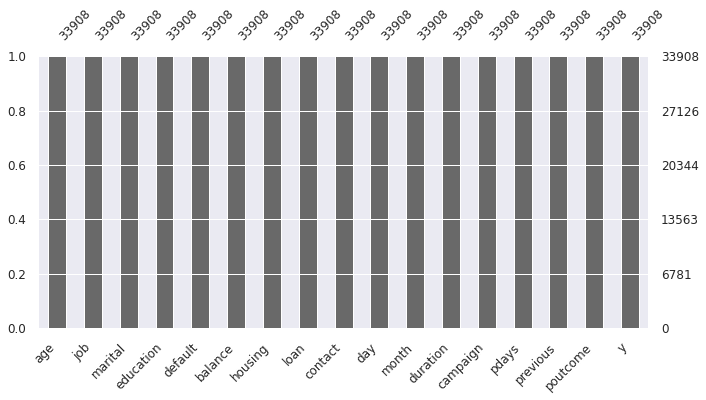

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(train, ax = axz, fontsize = 12)

In [ ]:
# checking for null values in Test Dataset
print("\033[1m" + "Test Null Values" + "\033[0m")
test.isna().any()

Test Null Values


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
dtype: bool

<Axes: >

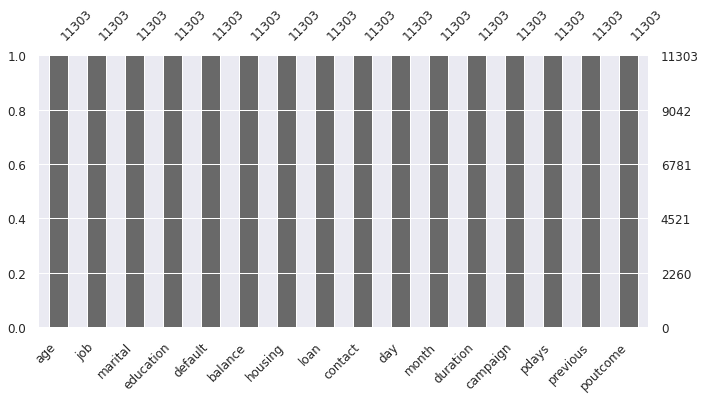

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(test, ax = axz, fontsize = 12)

Insight: From the above Numbers we can see that No null values present in Train Dataset as well as Test Dataset

#### 6.2.2.3 Unique Values Check

In [ ]:
# Train Dataset
train.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      6434
housing         2
loan            2
contact         3
day            31
month          12
duration     1469
campaign       44
pdays         512
previous       40
poutcome        4
y               2
dtype: int64

In [ ]:
# Test Dataset
test.nunique()

age            73
job            12
marital         3
education       4
default         2
balance      3927
housing         2
loan            2
contact         3
day            31
month          12
duration     1129
campaign       41
pdays         401
previous       30
poutcome        4
dtype: int64

In [ ]:
train.shape[0]

33908

In [ ]:
# Count values of categorical columns in Data
def count_unique(df, cols):
    for col in cols:
        print('\n' + "\033[1m"+ 'For column ' +col+"\033[0m")
        print(round((df[col].value_counts()/df.shape[0])*100,2))

In [ ]:
# Count values of categorical columns in Train Data
print("Percentage of Value Counts of each categorical column")
count_unique(train, train_cat)

Percentage of Value Counts of each categorical column

For column job
blue-collar      21.38
management       21.07
technician       16.88
admin.           11.38
services          9.15
retired           4.95
self-employed     3.57
entrepreneur      3.27
unemployed        2.89
housemaid         2.75
student           2.06
unknown           0.64
Name: job, dtype: float64

For column marital
married     60.16
single      28.31
divorced    11.53
Name: marital, dtype: float64

For column education
secondary    51.16
tertiary     29.72
primary      15.03
unknown       4.08
Name: education, dtype: float64

For column default
no     98.25
yes     1.75
Name: default, dtype: float64

For column housing
yes    55.79
no     44.21
Name: housing, dtype: float64

For column loan
no     83.97
yes    16.03
Name: loan, dtype: float64

For column contact
cellular     64.86
unknown      28.75
telephone     6.38
Name: contact, dtype: float64

For column month
may    30.40
jul    15.11
aug    13.94
jun    1

In [ ]:
# Count values of categorical columns in Train Data
print("Percentage of Value Counts of each categorical column")
count_unique(test, train_cat[:-1])

Percentage of Value Counts of each categorical column

For column job
blue-collar      21.96
management       20.48
technician       16.57
admin.           11.60
services          9.29
retired           5.19
entrepreneur      3.34
self-employed     3.26
unemployed        2.85
housemaid         2.71
student           2.11
unknown           0.64
Name: job, dtype: float64

For column marital
married     60.29
single      28.21
divorced    11.49
Name: marital, dtype: float64

For column education
secondary    51.81
tertiary     28.51
primary      15.51
unknown       4.18
Name: education, dtype: float64

For column default
no     98.04
yes     1.96
Name: default, dtype: float64

For column housing
yes    54.98
no     45.02
Name: housing, dtype: float64

For column loan
no     84.0
yes    16.0
Name: loan, dtype: float64

For column contact
cellular     64.50
unknown      28.93
telephone     6.56
Name: contact, dtype: float64

For column month
may    30.59
jul    15.67
aug    13.45
jun    11.

In [ ]:
# Plot for Unique value in each column and compare it between Test and Train Dataset
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values For Training Dataset","For Test Dataset"))

temp_data_train=train.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data_train.index, y=temp_data_train.values,marker=dict(color='#DEB078')),
    row=1, col=1
)

temp_data_test=test.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data_test.index, y=temp_data_test.values,marker=dict(color='#003f88')),
    row=1, col=2
)

fig.update_layout(height=400)
fig.show()

Insight: From the above plot, we see unique values present in training Dataset as well as test dataset is approx similliar in distribution across datasets

#### 6.2.2.3 Value Behaviour for Data

Train Data


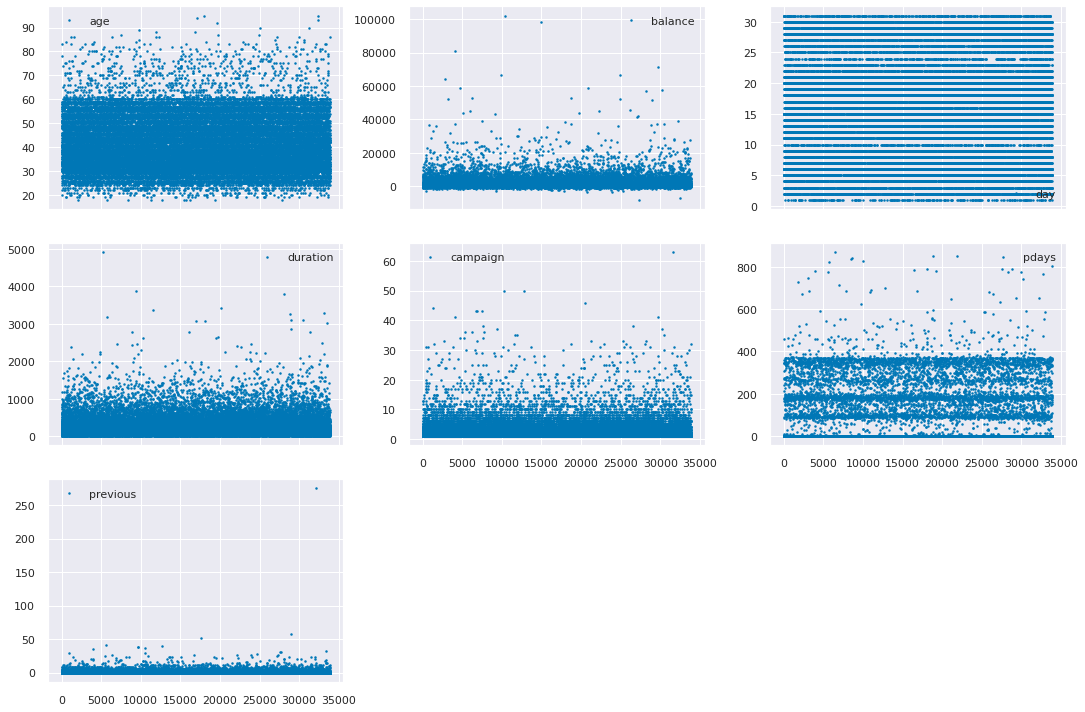

In [ ]:
# For all Numerical columnn for all rows in train data
train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(15,10), markersize=5,color='#0077b6')
print("\033[1m" + "Train Data" + "\033[0m")
plt.tight_layout()

Test Data


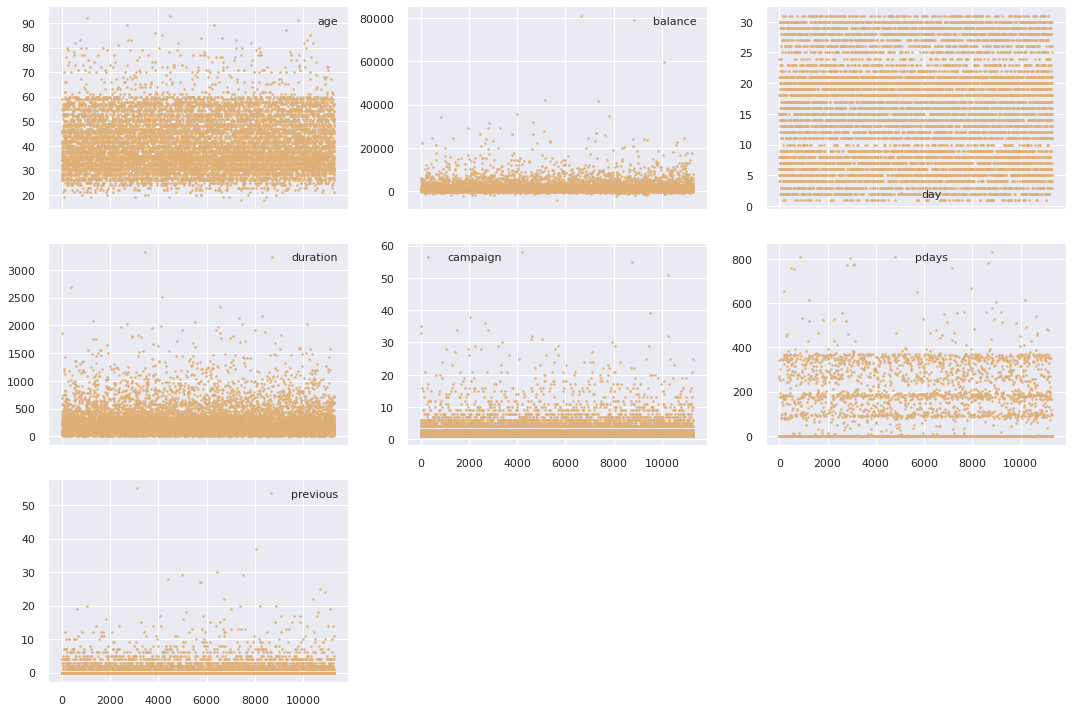

In [ ]:
# For all Numerical columnn for all rows in test data 
test.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(15,10), markersize=5,color='#DEB078')
print("\033[1m" + "Test Data" + "\033[0m")
plt.tight_layout()

Insights: Presence of Extreme values can be seen

#### 6.2.2.4 Short Summary of Dataset

In [ ]:
print("\033[1m" + "Train Data Numerical Columns" + "\033[0m")
train.describe()

Train Data Numerical Columns


,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print("\033[1m" + "Train Data Categorical Columns" + "\033[0m")
train.describe(include = "O")

Train Data Categorical Columns


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,33908,33908,33908,33908,33908,33908,33908,33908,33908,33908
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7250,20399,17346,33315,18916,28472,21994,10308,27710,29941


In [ ]:
print("\033[1m" + "Test Data Numerical Columns" + "\033[0m")
test.describe()

Test Data Numerical Columns


,age,balance,day,duration,campaign,pdays,previous
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,40.844555,1336.949571,15.814386,258.954614,2.796603,40.285765,0.575334
std,10.633874,2834.519004,8.346550,254.272247,3.185436,100.839679,1.939986
min,18.000000,-4057.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,68.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.500000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,93.000000,81204.000000,31.000000,3322.000000,58.000000,831.000000,55.000000


In [ ]:
print("\033[1m" + "Test Data Categorical Columns" + "\033[0m")
test.describe(include = "O")

Test Data Categorical Columns


,job,marital,education,default,housing,loan,contact,month,poutcome
count,11303,11303,11303,11303,11303,11303,11303,11303,11303
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,2482,6815,5856,11081,6214,9495,7291,3458,9249


### 6.2.3 Univariate Analysis

In [ ]:
# Bar plot Function
def plot_barplot(cols, col_y, title, df = train):
    for col in cols:
        sns.set(style="whitegrid")
        sns.set_palette("Set1", n_colors=7, desat=.7)
        sns.barplot(col, col_y, data=train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.title(title + ' by ' + col)
        plt.show()

In [ ]:
# Mosaic Plot function
def plot_mosaic(col1, col2, labelizer_given):
  return mosaic(train,[col1,col2], labelizer = labelizer_given)

In [ ]:
# FacetGrid function
def plot_facetgrid(column):
  g = sns.FacetGrid(data=train,col='y',height=3,aspect=1.2)
  g.map(sns.histplot,column)
  plt.show()

In [ ]:
# Histplot function
def plot_histplot(col):
  plt.figure(figsize=(10,5))
  sns.histplot(x=train[col],color='green',label=col, kde=True)
  plt.title('Distribution of '+col)
  plt.show()

In [ ]:
def plot_boxplot(col, data = train):
  sns.set(style="darkgrid")
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.boxplot(x=col, data = data, y= "y", color='green')
  ax.set_title('Boxplot of '+col)
  ax.set_xlabel('Count')
  ax.set_ylabel(col)

In [ ]:
# Count plot function
def plot_count(col):
  plt.figure(figsize=(15,4))
  ax=sns.countplot(x=col,data=train, palette = "hls")
  plt.show()

In [ ]:
# Count plot function with target variable
def plot_count_target(col):
  plt.figure(figsize=(12,6))
  sns.countplot(data=train,x= col,hue='y')
  plt.xticks(rotation='vertical')
  plt.show()

In [ ]:
def plot_piechart(data, column_name):
    values = data[column_name].value_counts()
    labels = values.index.tolist()
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(f"{column_name} Distribution")
    plt.show()

#### y : Target Variable 

In [ ]:
# y variable datatype
train.y.dtypes

dtype('O')

In [ ]:
print("Null Value in y :", train.y.isnull().sum())
print("Number of Unique Values in y :", train.y.nunique())

Null Value in y : 0
Number of Unique Values in y : 2


In [ ]:
print("Number of Yes and No in y are :\n", train.y.value_counts())

Number of Yes and No in y are :
 no     29941
yes     3967
Name: y, dtype: int64


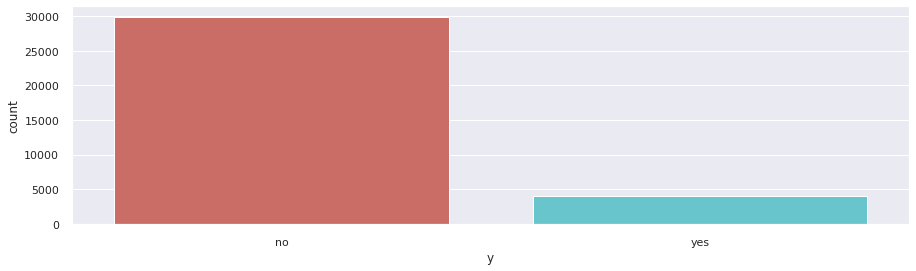

In [ ]:
# count plot of y (target) variable
plot_count("y")

In [ ]:
# Percentage of yes and no class in y (target variable)
count_unique(train, "y")


For column y
no     88.3
yes    11.7
Name: y, dtype: float64


Insights: There is imbalanced dataset situation

In [ ]:
# Short summary of y variable
train.y.describe()

count     33908
unique        2
top          no
freq      29941
Name: y, dtype: object

Insights: No class is dominating with 29941 rows out of 33908

Only 11.7% of clients are subscribing. So, our aim is to improve the subscription and minimize the operational cost used during this process

#### Age 

In [ ]:
# age variable datatype
train.age.dtypes

dtype('int64')

In [ ]:
# Null value in age column
count_NotNullValues_Age = len(train[train.age.notnull()])
count_NullValues_Age = len(train[train.age.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_Age / (len(train.age)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_Age / (len(train.age)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in age column
print("Number of Unique Values in age :", train['age'].nunique())

Number of Unique Values in age : 77


In [ ]:
# short summary of age column
print(train['age'].describe())

count    33908.000000
mean        40.966763
std         10.613701
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


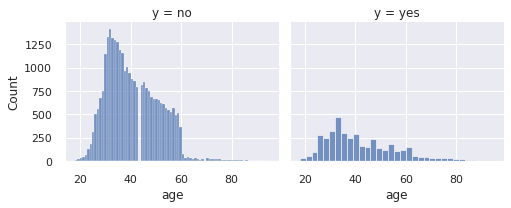

In [ ]:
plot_facetgrid("age")

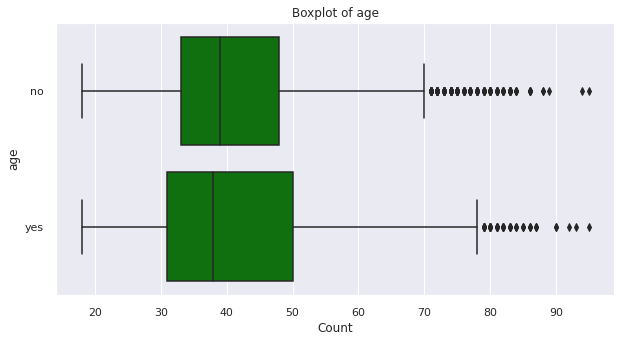

In [ ]:
plot_boxplot("age")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["age"])
kurt = kurtosis(train[train["y"]=="yes"]["age"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 0.86, Kurtosis: 0.27


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["age"])
kurt = kurtosis(train[train["y"]=="no"]["age"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 0.59, Kurtosis: 0.05


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

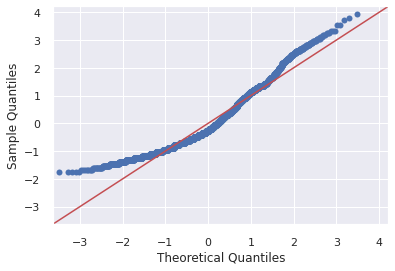

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["age"],norm,fit=True,line="45")
plt.show()

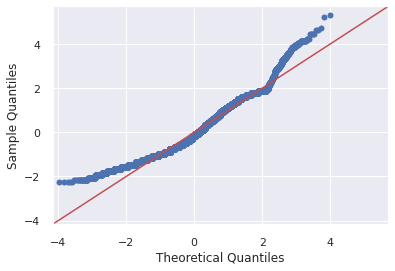

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["age"],norm,fit=True,line="45")
plt.show()

Insights: As we see there is outlier in the age variable and it is right skewed distribution. So, we can try outlier treatment by different methods or convert age variable to categorical by using Quantile binning method.


#### Job

In [ ]:
# job variable datatype
train.job.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in job variable
print("Null Value in job :", train.job.isnull().sum())
print("Number of Unique Values in job :", train.job.nunique())

Null Value in job : 0
Number of Unique Values in job : 12


In [ ]:
# Value counts of classes in job variable
print("Number of Classes in job variable are :\n", train.job.value_counts())

Number of Classes in job variable are :
 blue-collar      7250
management       7143
technician       5724
admin.           3860
services         3104
retired          1677
self-employed    1210
entrepreneur     1110
unemployed        981
housemaid         934
student           699
unknown           216
Name: job, dtype: int64


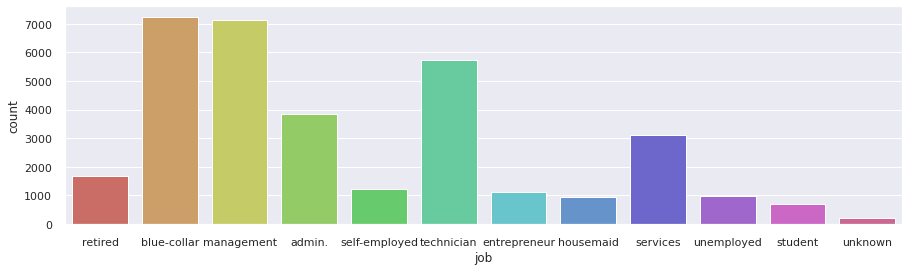

In [ ]:
# count plot of job variable
plot_count("job")

In [ ]:
# Percentage of each class value count in Job
print('\n' + "\033[1m"+ 'For column Job'+"\033[0m")
print(round((train["job"].value_counts()/train.shape[0])*100,2))


For column Job
blue-collar      21.38
management       21.07
technician       16.88
admin.           11.38
services          9.15
retired           4.95
self-employed     3.57
entrepreneur      3.27
unemployed        2.89
housemaid         2.75
student           2.06
unknown           0.64
Name: job, dtype: float64


In [ ]:
# Short summary of job variable
train.job.describe()

count           33908
unique             12
top       blue-collar
freq             7250
Name: job, dtype: object

Insights: Blue-Collar and Management Job type clients are maximum and there are very less number of student job type

We have to treat unknown class or we can merge these classes


#### Marital

In [ ]:
# marital variable datatype
train.marital.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in marital variable
print("Null Value in marital :", train.marital.isnull().sum())
print("Number of Unique Values in marital :", train.marital.nunique())

Null Value in marital : 0
Number of Unique Values in marital : 3


In [ ]:
# Value counts of classes in marital variable
print("Number of Classes in marital variable are :\n", train.marital.value_counts())

Number of Classes in marital variable are :
 married     20399
single       9601
divorced     3908
Name: marital, dtype: int64


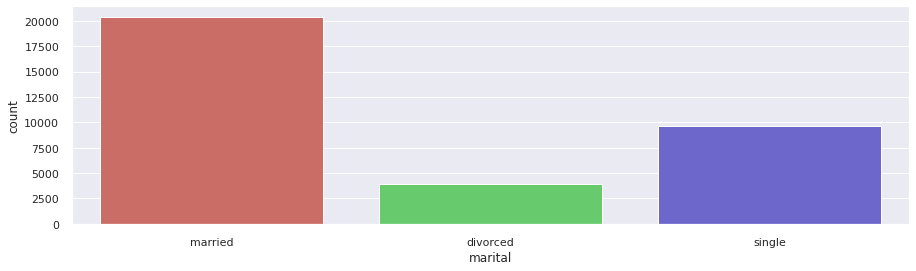

In [ ]:
# count plot of marital variable
plot_count("marital")

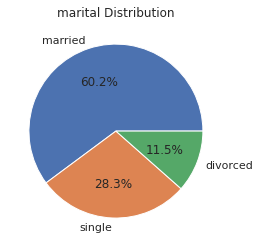

In [ ]:
plot_piechart(train, "marital")

In [ ]:
# Percentage value counts of Marital column
print('\n' + "\033[1m"+ 'For column Marital'+"\033[0m")
print(round((train["marital"].value_counts()/train.shape[0])*100,2))


For column Marital
married     60.16
single      28.31
divorced    11.53
Name: marital, dtype: float64


In [ ]:
# Short summary of marital variable
train.marital.describe()

count       33908
unique          3
top       married
freq        20399
Name: marital, dtype: object

Insights: Most of the clients are Married - 60.16 %

#### Education

In [ ]:
# education variable datatype
train.education.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in education variable
print("Null Value in education :", train.education.isnull().sum())
print("Number of Unique Values in education :", train.education.nunique())

Null Value in education : 0
Number of Unique Values in education : 4


In [ ]:
# Value counts of classes in education variable
print("Number of Classes in education variable are :\n", train.education.value_counts())

Number of Classes in education variable are :
 secondary    17346
tertiary     10079
primary       5098
unknown       1385
Name: education, dtype: int64


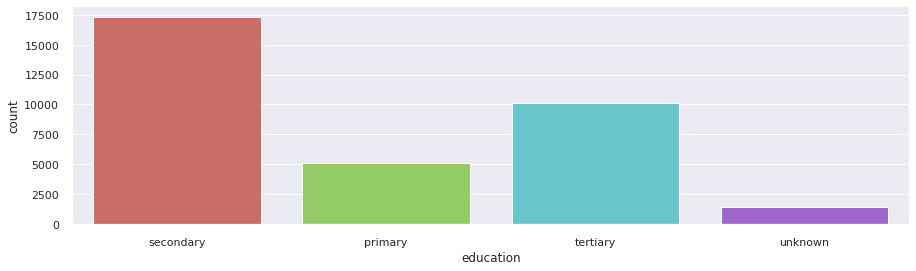

In [ ]:
# count plot of education variable
plot_count("education")

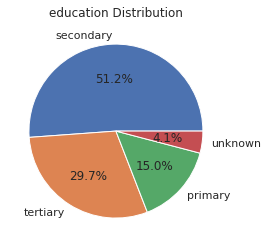

In [ ]:
plot_piechart(train, "education")

In [ ]:
# Percentage value counts of education column
print('\n' + "\033[1m"+ 'For column education'+"\033[0m")
print(round((train["education"].value_counts()/train.shape[0])*100,2))


For column education
secondary    51.16
tertiary     29.72
primary      15.03
unknown       4.08
Name: education, dtype: float64


In [ ]:
# Short summary of education variable
train.education.describe()

count         33908
unique            4
top       secondary
freq          17346
Name: education, dtype: object

Insights: Most of the clients are Secondary education category - 51.16%

There is unknown field in education type also. So, we can take this class as null value and treat this as null value if this improves accuracy.

#### Default

In [ ]:
# default variable datatype
train.default.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in default variable
print("Null Value in defualt :", train.default.isnull().sum())
print("Number of Unique Values in default :", train.default.nunique())

Null Value in defualt : 0
Number of Unique Values in default : 2


In [ ]:
# Value counts of classes in default variable
print("Number of Classes in default variable are :\n", train.default.value_counts())

Number of Classes in default variable are :
 no     33315
yes      593
Name: default, dtype: int64


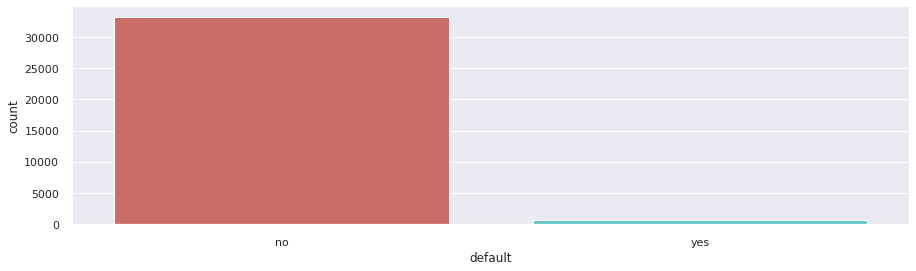

In [ ]:
# count plot of default variable
plot_count("default")

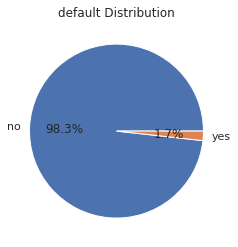

In [ ]:
# pie chart of defualt column
plot_piechart(train, "default")

In [ ]:
# Percentage value counts of default column
print('\n' + "\033[1m"+ 'For column default'+"\033[0m")
print(round((train["default"].value_counts()/train.shape[0])*100,2))


For column default
no     98.25
yes     1.75
Name: default, dtype: float64


In [ ]:
# Short summary of Default variable
train.default.describe()

count     33908
unique        2
top          no
freq      33315
Name: default, dtype: object

Insights: Most of the customers does not have Credit in Default- 98.25%

We can try removing this feature as this feature is approximately constant for all rows means very low variance, so it does not affect much target variable, only if this improves accuracy

#### Balance

In [ ]:
# balance variable datatype
train.balance.dtypes

dtype('int64')

In [ ]:
# Null value in balance column
count_NotNullValues_balance = len(train[train.balance.notnull()])
count_NullValues_balance = len(train[train.balance.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_balance / (len(train.balance)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_balance / (len(train.balance)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in balance column
print("Number of Unique Values in balance :", train['balance'].nunique())

Number of Unique Values in balance : 6434


In [ ]:
# short summary of balance column
print(train['balance'].describe())

count     33908.000000
mean       1370.713136
std        3111.689069
min       -8019.000000
25%          74.000000
50%         450.000000
75%        1430.000000
max      102127.000000
Name: balance, dtype: float64


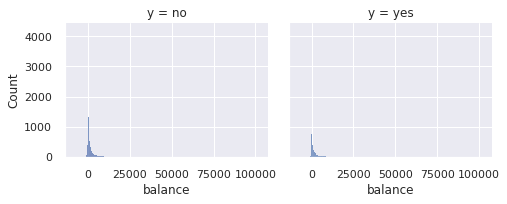

In [ ]:
plot_facetgrid("balance")

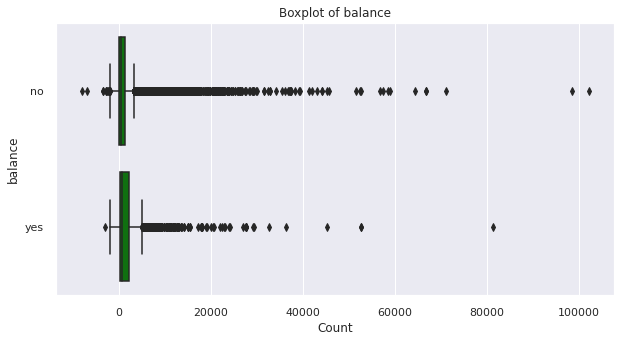

In [ ]:
plot_boxplot("balance")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["balance"])
kurt = kurtosis(train[train["y"]=="yes"]["balance"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 7.78, Kurtosis: 113.27


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["balance"])
kurt = kurtosis(train[train["y"]=="no"]["balance"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 8.84, Kurtosis: 155.31


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

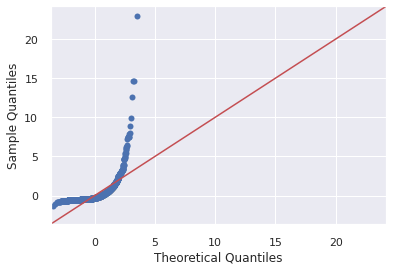

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["balance"],norm,fit=True,line="45")
plt.show()

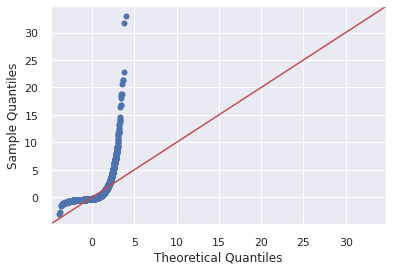

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["balance"],norm,fit=True,line="45")
plt.show()

Insights: As we see there is so many outlier in the balance variable and it is right skewed distribution. So, we can try outlier treatment by different methods or try some transformations to make it normal distribution


#### Housing

In [ ]:
# housing variable datatype
train.housing.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in housing variable
print("Null Value in housing :", train.housing.isnull().sum())
print("Number of Unique Values in housing :", train.housing.nunique())

Null Value in housing : 0
Number of Unique Values in housing : 2


In [ ]:
# Value counts of classes in housing variable
print("Number of Classes in housing variable are :\n", train.housing.value_counts())

Number of Classes in housing variable are :
 yes    18916
no     14992
Name: housing, dtype: int64


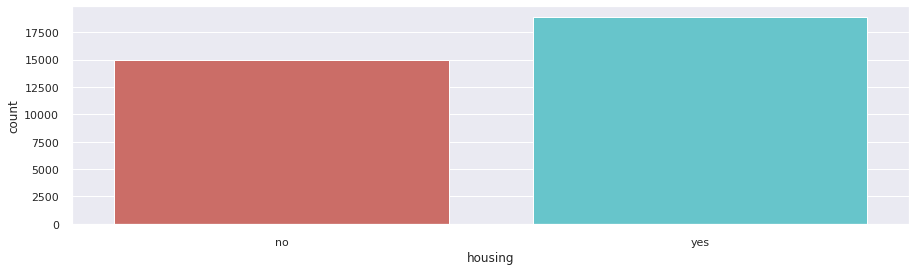

In [ ]:
# count plot of housing variable
plot_count("housing")

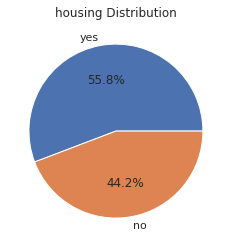

In [ ]:
plot_piechart(train, "housing")

In [ ]:
# Percentage value counts of housing column
print('\n' + "\033[1m"+ 'For column housing'+"\033[0m")
print(round((train["housing"].value_counts()/train.shape[0])*100,2))


For column housing
yes    55.79
no     44.21
Name: housing, dtype: float64


In [ ]:
# Short summary of education variable
train.housing.describe()

count     33908
unique        2
top         yes
freq      18916
Name: housing, dtype: object

Insights: Most of the customer have Housing Loan- 55.79%

#### Loan

In [ ]:
# loan variable datatype
train.loan.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in loan variable
print("Null Value in loan :", train.loan.isnull().sum())
print("Number of Unique Values in loan :", train.loan.nunique())

Null Value in loan : 0
Number of Unique Values in loan : 2


In [ ]:
# Value counts of classes in loan variable
print("Number of Classes in loan variable are :\n", train.loan.value_counts())

Number of Classes in loan variable are :
 no     28472
yes     5436
Name: loan, dtype: int64


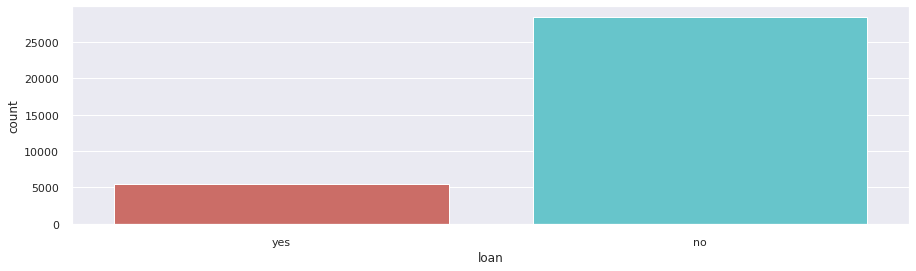

In [ ]:
# count plot of loan variable
plot_count("loan")

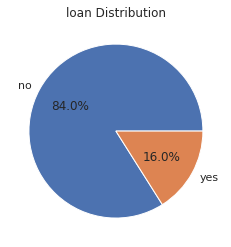

In [ ]:
plot_piechart(train, "loan")

In [ ]:
# Percentage value counts of loan column
print('\n' + "\033[1m"+ 'For column loan'+"\033[0m")
print(round((train["loan"].value_counts()/train.shape[0])*100,2))


For column loan
no     83.97
yes    16.03
Name: loan, dtype: float64


In [ ]:
# Short summary of loan variable
train.loan.describe()

count     33908
unique        2
top          no
freq      28472
Name: loan, dtype: object

Insights: Most of the customer does not have Personal loan- 83.97% 

#### Contact

In [ ]:
# contact variable datatype
train.contact.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in contact variable
print("Null Value in contact :", train.contact.isnull().sum())
print("Number of Unique Values in contact :", train.contact.nunique())

Null Value in contact : 0
Number of Unique Values in contact : 3


In [ ]:
# Value counts of classes in contact variable
print("Number of Classes in contact variable are :\n", train.contact.value_counts())

Number of Classes in contact variable are :
 cellular     21994
unknown       9750
telephone     2164
Name: contact, dtype: int64


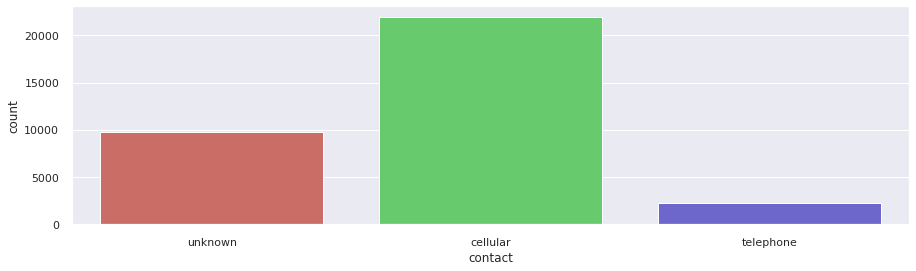

In [ ]:
# count plot of contact variable
plot_count("contact")

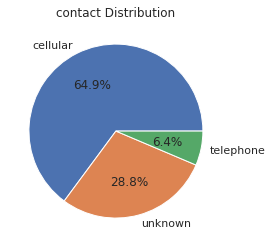

In [ ]:
plot_piechart(train, "contact")

In [ ]:
# Percentage value counts of contact column
print('\n' + "\033[1m"+ 'For column contact'+"\033[0m")
print(round((train["contact"].value_counts()/train.shape[0])*100,2))


For column contact
cellular     64.86
unknown      28.75
telephone     6.38
Name: contact, dtype: float64


In [ ]:
# Short summary of contact variable
train.contact.describe()

count        33908
unique           3
top       cellular
freq         21994
Name: contact, dtype: object

Insights: Most of the cutomers are contacted through cellular- 64.86%

#### day

In [ ]:
# day variable datatype
train.day.dtypes

dtype('int64')

In [ ]:
# Null value in day column
count_NotNullValues_day = len(train[train.day.notnull()])
count_NullValues_day = len(train[train.day.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_day / (len(train.day)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_day / (len(train.day)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in day column
print("Number of Unique Values in day :", train['day'].nunique())

Number of Unique Values in day : 31


In [ ]:
# short summary of day column
print(train['day'].describe())

count    33908.000000
mean        15.803763
std          8.314558
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


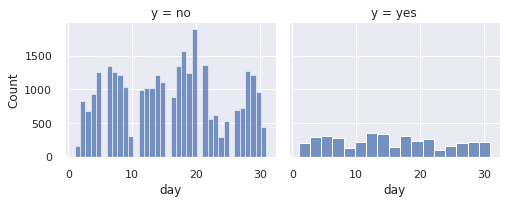

In [ ]:
plot_facetgrid("day")

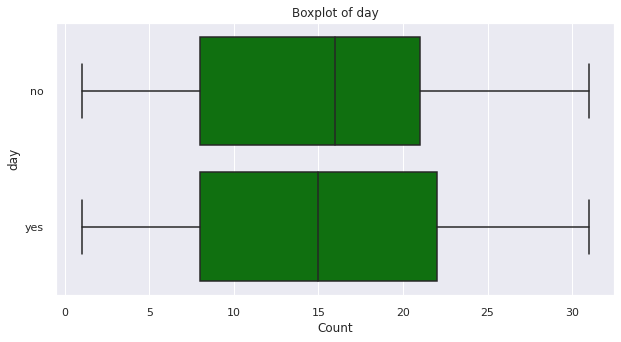

In [ ]:
plot_boxplot("day")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["day"])
kurt = kurtosis(train[train["y"]=="yes"]["day"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 0.17, Kurtosis: -1.06


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["day"])
kurt = kurtosis(train[train["y"]=="no"]["day"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 0.08, Kurtosis: -1.06


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

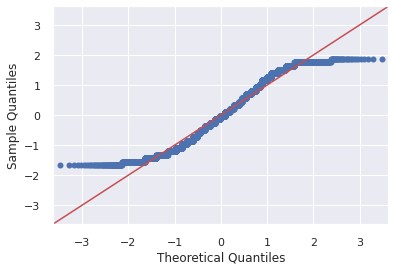

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["day"],norm,fit=True,line="45")
plt.show()

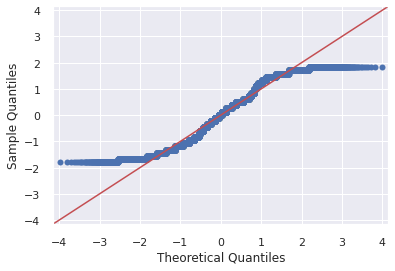

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["day"],norm,fit=True,line="45")
plt.show()

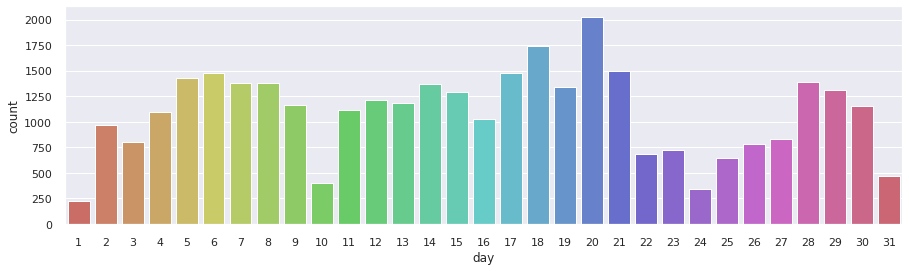

In [ ]:
plot_count("day")

Insights: As we see there is no outlier in the day variable.


#### Month

In [ ]:
# month variable datatype
train.month.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in month variable
print("Null Value in month :", train.month.isnull().sum())
print("Number of Unique Values in month :", train.month.nunique())

Null Value in month : 0
Number of Unique Values in month : 12


In [ ]:
# Value counts of classes in month variable
print("Number of Classes in month variable are :\n", train.month.value_counts())

Number of Classes in month variable are :
 may    10308
jul     5124
aug     4727
jun     4004
nov     2997
apr     2198
feb     2025
jan     1048
oct      525
sep      432
mar      351
dec      169
Name: month, dtype: int64


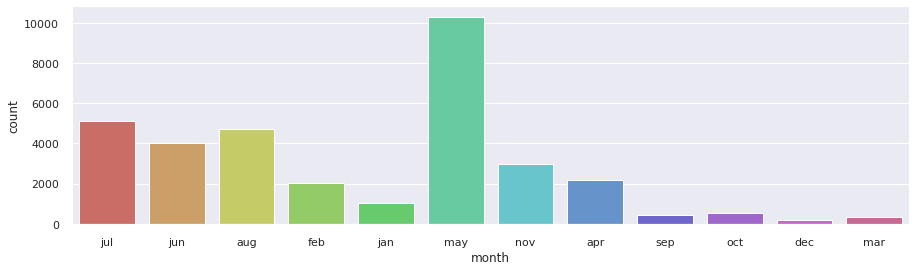

In [ ]:
# count plot of month variable
plot_count("month")

In [ ]:
# Percentage value counts of month column
print('\n' + "\033[1m"+ 'For column month'+"\033[0m")
print(round((train["month"].value_counts()/train.shape[0])*100,2))


For column month
may    30.40
jul    15.11
aug    13.94
jun    11.81
nov     8.84
apr     6.48
feb     5.97
jan     3.09
oct     1.55
sep     1.27
mar     1.04
dec     0.50
Name: month, dtype: float64


In [ ]:
# Short summary of month variable
train.month.describe()

count     33908
unique       12
top         may
freq      10308
Name: month, dtype: object

Insights: Most of the customers are contacted in the months of may, july, august and very few are contacted 

#### Duration

In [ ]:
# duration variable datatype
train.duration.dtypes

dtype('int64')

In [ ]:
# Null value in duration column
count_NotNullValues_duration = len(train[train.duration.notnull()])
count_NullValues_duration = len(train[train.duration.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_duration / (len(train.duration)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_duration / (len(train.duration)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in duration column
print("Number of Unique Values in duration :", train['duration'].nunique())

Number of Unique Values in duration : 1469


In [ ]:
# short summary of duration column
print(train['duration'].describe())

count    33908.000000
mean       257.899227
std        258.607105
min          0.000000
25%        103.000000
50%        179.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64


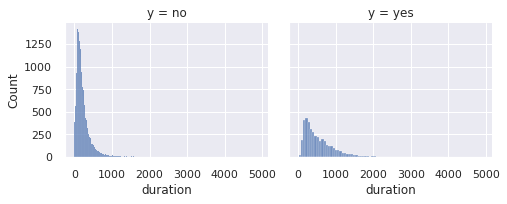

In [ ]:
plot_facetgrid("duration")

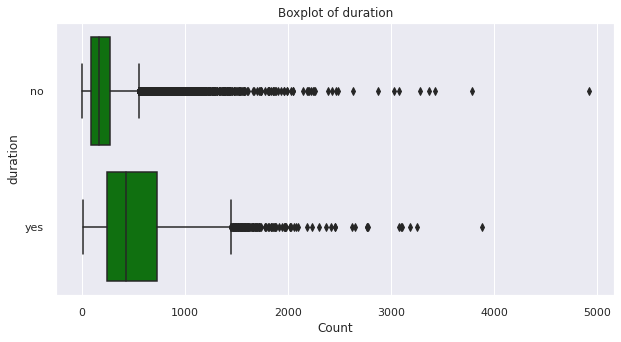

In [ ]:
plot_boxplot("duration")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["duration"])
kurt = kurtosis(train[train["y"]=="yes"]["duration"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 1.78, Kurtosis: 5.61


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["duration"])
kurt = kurtosis(train[train["y"]=="no"]["duration"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 3.78, Kurtosis: 32.90


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

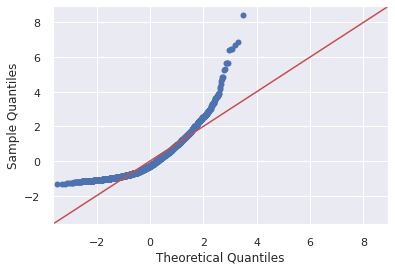

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["duration"],norm,fit=True,line="45")
plt.show()

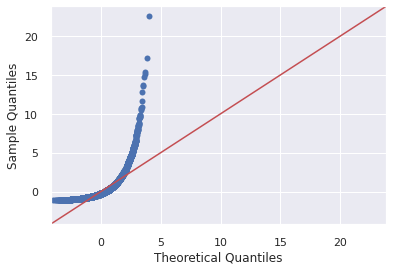

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["duration"],norm,fit=True,line="45")
plt.show()

Insights: As we seen there is outlier in the duration variable and it is right skewed distribution. So, we can try outlier treatment by different methods or try some transformations to make it normal distribution or we can try convert duration (seconds) into minutes


#### Campaign

In [ ]:
# campaign variable datatype
train.campaign.dtypes

dtype('int64')

In [ ]:
# Null value in campaign column
count_NotNullValues_campaign = len(train[train.campaign.notnull()])
count_NullValues_campaign = len(train[train.campaign.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_campaign / (len(train.campaign)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_campaign / (len(train.campaign)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in campaign column
print("Number of Unique Values in age :", train['campaign'].nunique())

Number of Unique Values in age : 44


In [ ]:
# short summary of age column
print(train['campaign'].describe())

count    33908.000000
mean         2.752920
std          3.068299
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


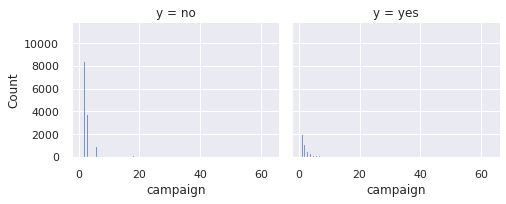

In [ ]:
plot_facetgrid("campaign")

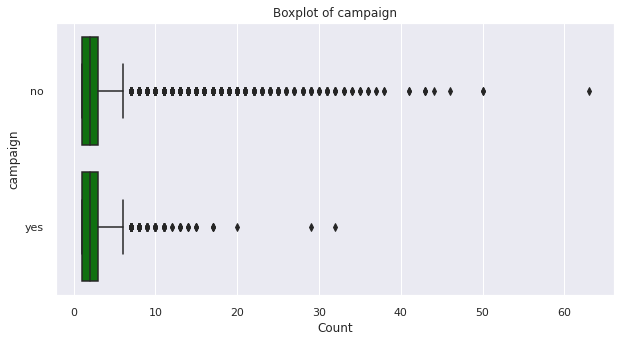

In [ ]:
plot_boxplot("campaign")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["campaign"])
kurt = kurtosis(train[train["y"]=="yes"]["campaign"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 4.33, Kurtosis: 37.38


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["campaign"])
kurt = kurtosis(train[train["y"]=="no"]["campaign"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 4.77, Kurtosis: 36.31


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

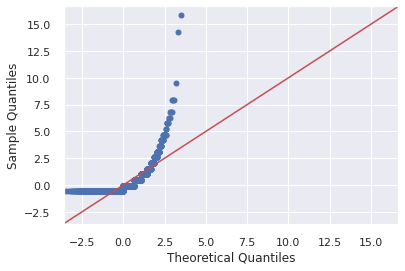

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["campaign"],norm,fit=True,line="45")
plt.show()

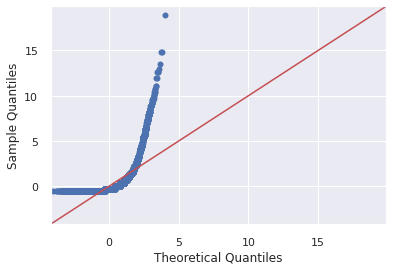

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["campaign"],norm,fit=True,line="45")
plt.show()

Insights: As we seen there is outlier in the campaign variable and it is right skewed distribution. So, we can try outlier treatment by different methods or try some transformations to make it normal distribution


#### pdays

In [ ]:
# pdays variable datatype
train.pdays.dtypes

dtype('int64')

In [ ]:
# Null value in pdays column
count_NotNullValues_pdays = len(train[train.pdays.notnull()])
count_NullValues_pdays = len(train[train.pdays.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_pdays / (len(train.pdays)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_pdays / (len(train.pdays)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in pdays column
print("Number of Unique Values in pdays :", train['pdays'].nunique())

Number of Unique Values in pdays : 512


In [ ]:
# short summary of pdays column
print(train['pdays'].describe())

count    33908.000000
mean        40.168515
std         99.892114
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


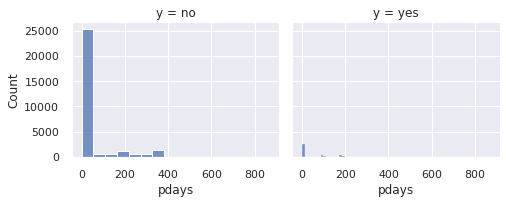

In [ ]:
plot_facetgrid("pdays")

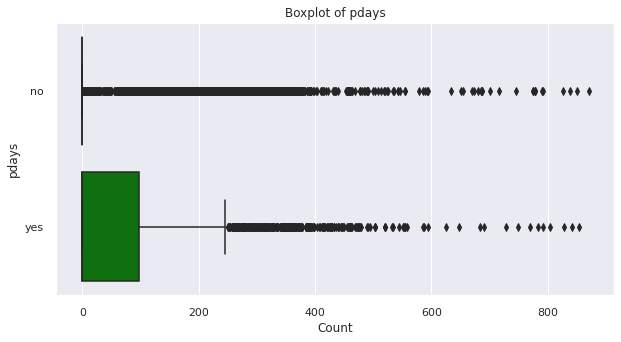

In [ ]:
plot_boxplot("pdays")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["pdays"])
kurt = kurtosis(train[train["y"]=="yes"]["pdays"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 2.11, Kurtosis: 5.30


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["pdays"])
kurt = kurtosis(train[train["y"]=="no"]["pdays"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 2.69, Kurtosis: 6.98


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

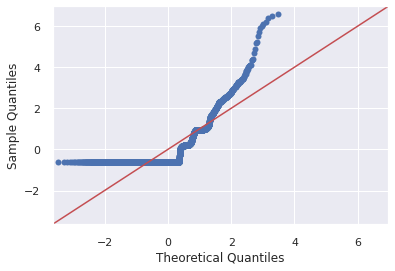

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["pdays"],norm,fit=True,line="45")
plt.show()

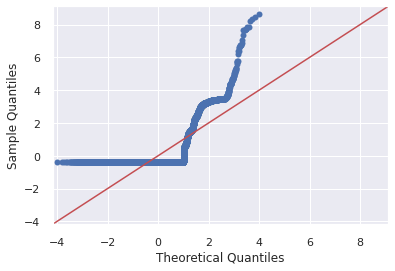

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["pdays"],norm,fit=True,line="45")
plt.show()

Insights: As we see there is outlier in the pdays variable and it is right skewed distribution. So, we can try outlier treatment by different methods or try some transformations to make it normal distribution


#### previous

In [ ]:
# previous variable datatype
train.previous.dtypes

dtype('int64')

In [ ]:
# Null value in previous column
count_NotNullValues_previous = len(train[train.previous.notnull()])
count_NullValues_previous = len(train[train.previous.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_previous / (len(train.previous)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_previous / (len(train.previous)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


In [ ]:
# Unique Values in previous column
print("Number of Unique Values in previous :", train['previous'].nunique())

Number of Unique Values in previous : 40


In [ ]:
# short summary of previous column
print(train['previous'].describe())

count    33908.000000
mean         0.581987
std          2.412482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


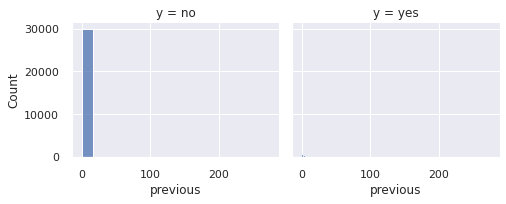

In [ ]:
plot_facetgrid("previous")

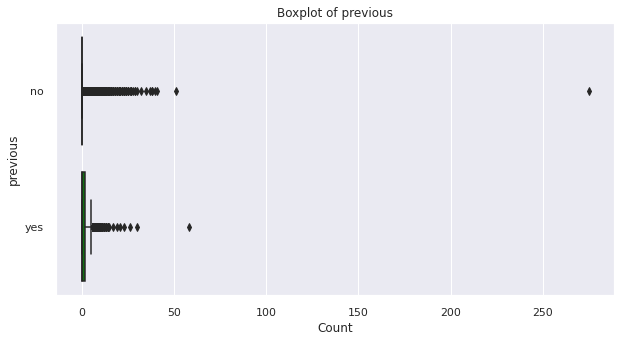

In [ ]:
plot_boxplot("previous")

In [ ]:
# checking skewness and kurtosis (when class is yes)
sk = skew(train[train["y"]=="yes"]["previous"])
kurt = kurtosis(train[train["y"]=="yes"]["previous"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 5.96, Kurtosis: 88.12


In [ ]:
# checking skewness and kurtosis (when class is no)
sk = skew(train[train["y"]=="no"]["previous"])
kurt = kurtosis(train[train["y"]=="no"]["previous"])
print(f'Skewness: {sk:.2f}, Kurtosis: {kurt:.2f}')

Skewness: 53.61, Kurtosis: 5772.88


1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

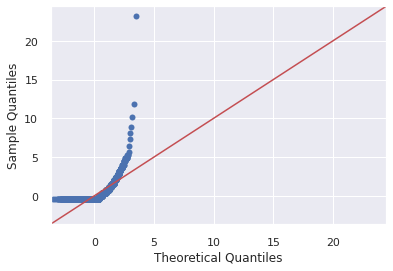

In [ ]:
# checking normal distribution with qq plot in yes case
qqplot(train[train["y"]=="yes"]["previous"],norm,fit=True,line="45")
plt.show()

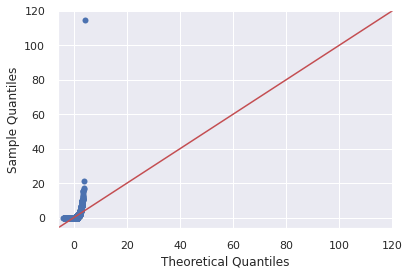

In [ ]:
# checking normal distribution with qq plot in no case
qqplot(train[train["y"]=="no"]["previous"],norm,fit=True,line="45")
plt.show()

Insights: As we see there is outlier in the previous variable and it is right skewed distribution. So, we can try outlier treatment by different methods or try some transformations to make it normal distribution


#### Poutcome

In [ ]:
# poutcome variable datatype
train.poutcome.dtypes

dtype('O')

In [ ]:
# Checking Null and Unique Value in poutcome variable
print("Null Value in poutcome :", train.poutcome.isnull().sum())
print("Number of Unique Values in poutcome :", train.poutcome.nunique())

Null Value in poutcome : 0
Number of Unique Values in poutcome : 4


In [ ]:
# Value counts of classes in poutcome variable
print("Number of Classes in poutcome variable are :\n", train.poutcome.value_counts())

Number of Classes in poutcome variable are :
 unknown    27710
failure     3686
other       1373
success     1139
Name: poutcome, dtype: int64


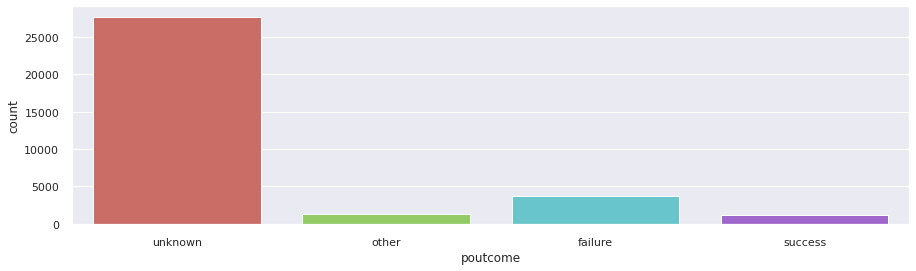

In [ ]:
# count plot of poutcome variable
plot_count("poutcome")

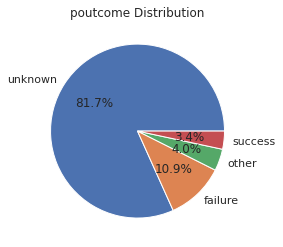

In [ ]:
plot_piechart(train, "poutcome")

In [ ]:
# Percentage value counts of poutcome column
print('\n' + "\033[1m"+ 'For column poutcome'+"\033[0m")
print(round((train["poutcome"].value_counts()/train.shape[0])*100,2))


For column poutcome
unknown    81.72
failure    10.87
other       4.05
success     3.36
Name: poutcome, dtype: float64


In [ ]:
# Short summary of poutcome variable
train.poutcome.describe()

count       33908
unique          4
top       unknown
freq        27710
Name: poutcome, dtype: object

Insights: There are 81.72% of unknown previous outcomes, which is not surprising because many customers don't have previous contacts.

### 6.2.4 Bivariate Analysis

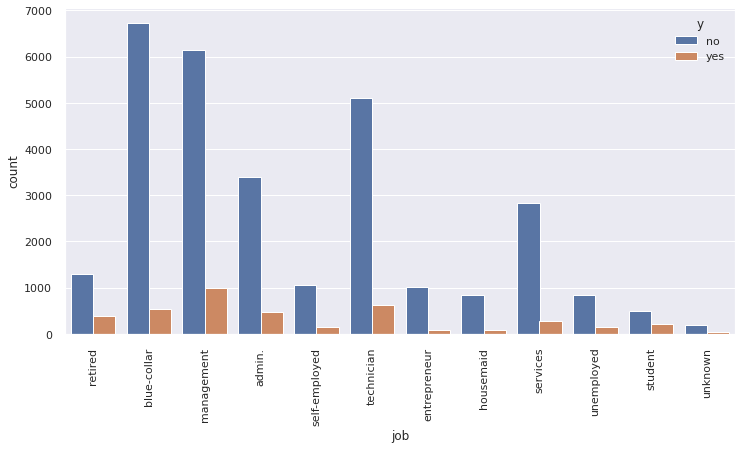

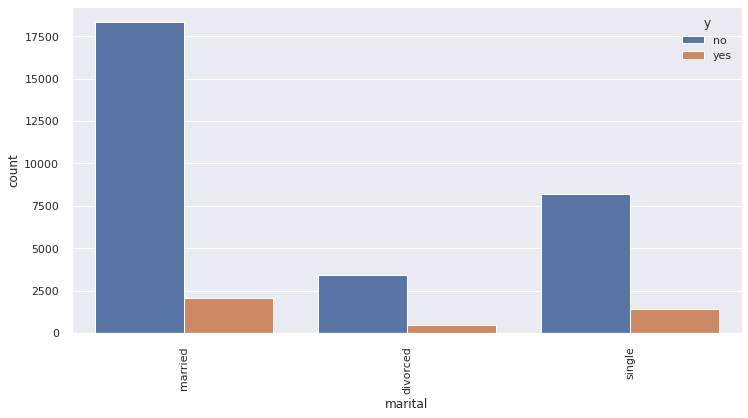

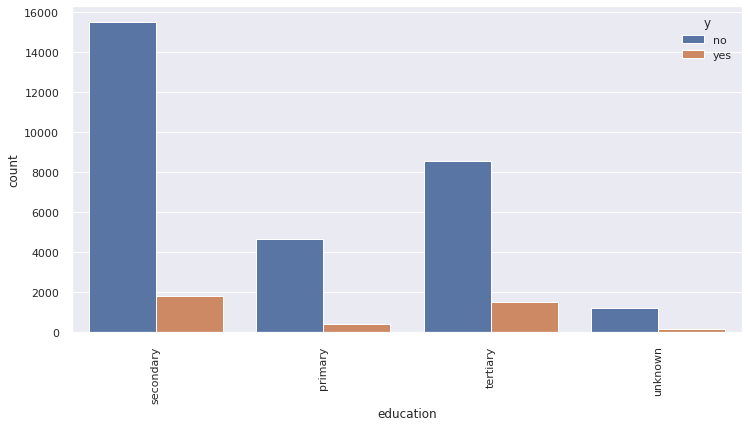

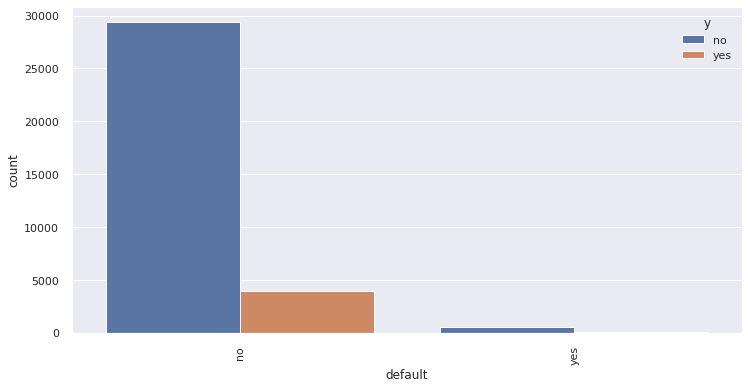

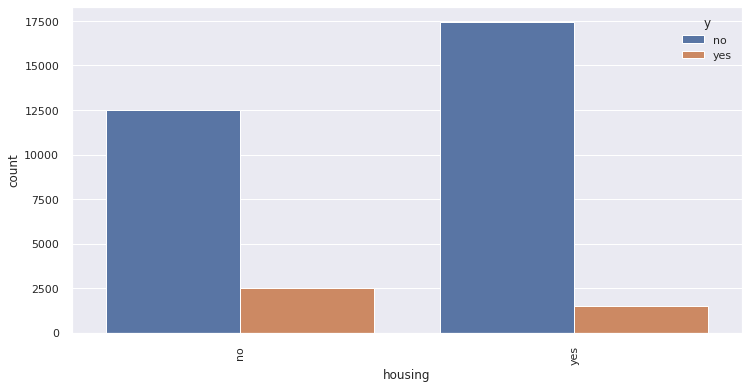

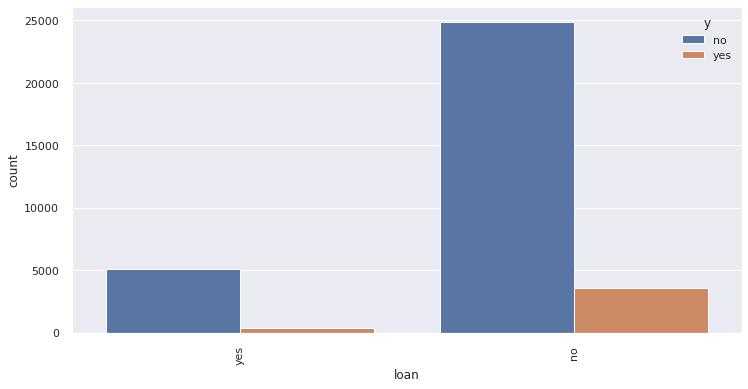

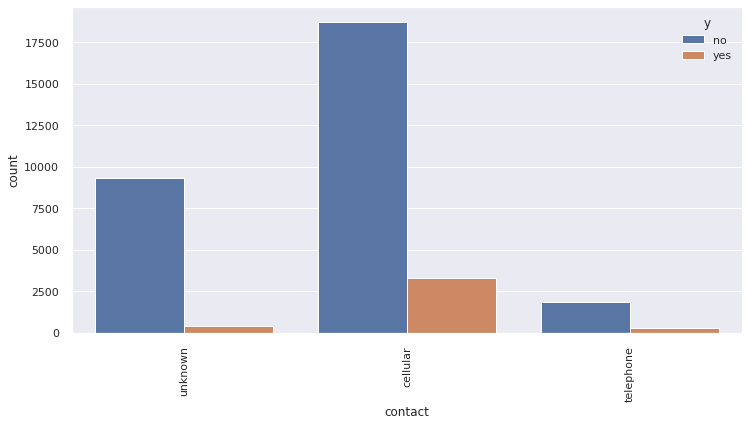

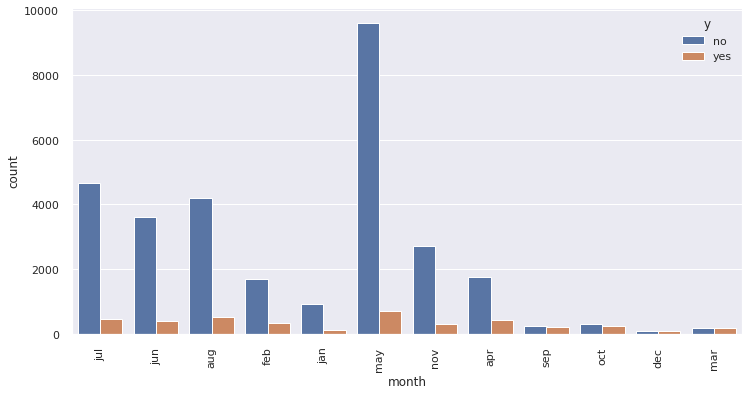

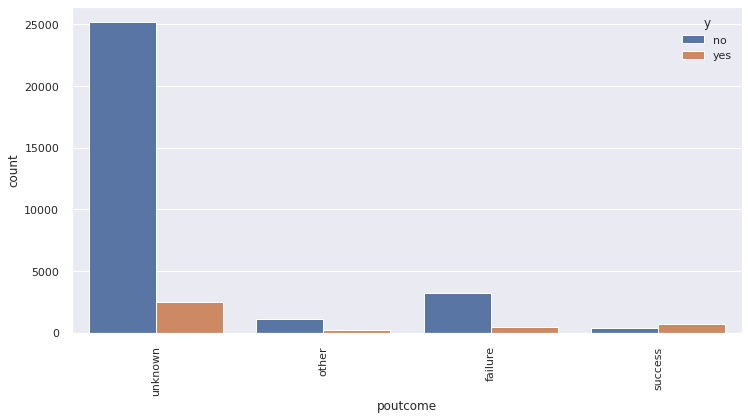

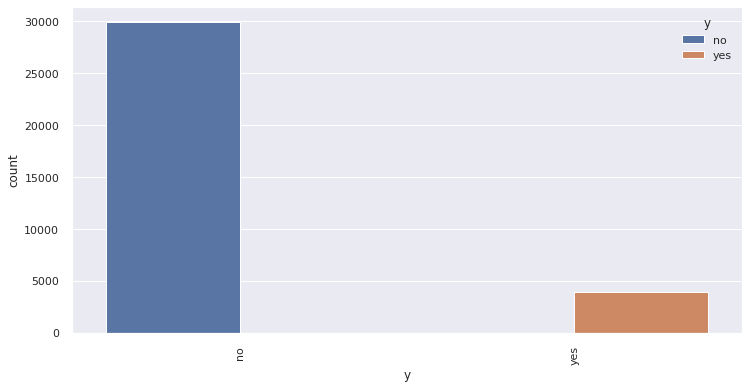

In [ ]:
# count plot of all categorical columns with target variable 
for i in train_cat:
  plot_count_target(i)

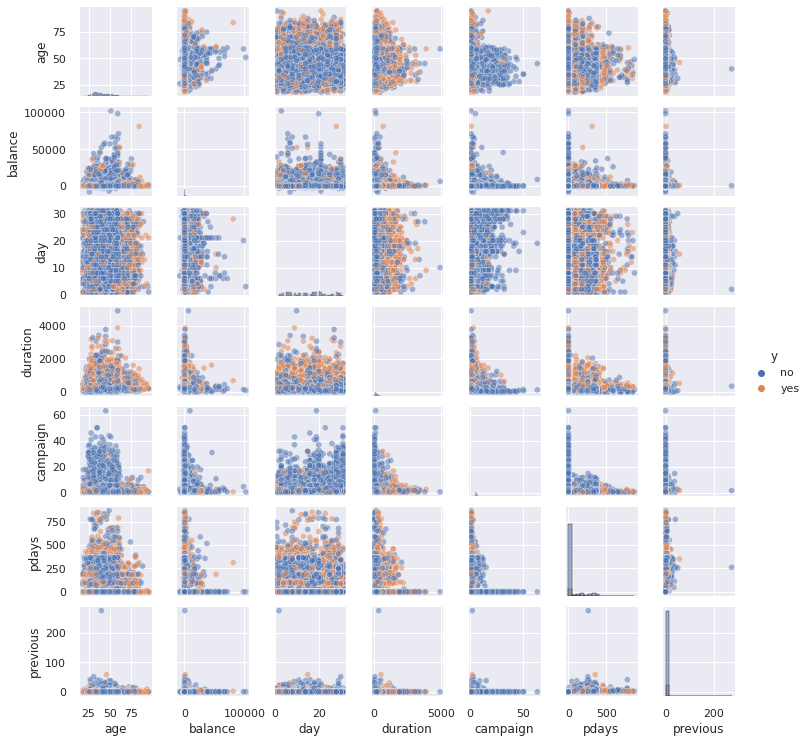

In [ ]:
# Scatterplots to search for linear and non-linear relationships and histograms.
sns.pairplot(train, diag_kind='hist',  hue= "y", height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

In [ ]:
def count_table_with_target(col,data = train):
  count_job_response = pd.crosstab(data['y'], data[col]).apply(lambda x: x/x.sum() * 100)
  count_job_response = count_job_response.transpose()
  print("\033[1m" + col.upper() + "\033[0m")
  print(count_job_response)
  print("\n")

In [ ]:
for i in train_cat[:-1]:
  count_table_with_target(i)

JOB
y                     no        yes
job                                
admin.         87.797927  12.202073
blue-collar    92.731034   7.268966
entrepreneur   91.981982   8.018018
housemaid      91.006424   8.993576
management     86.084278  13.915722
retired        77.221228  22.778772
self-employed  87.851240  12.148760
services       91.108247   8.891753
student        71.101574  28.898426
technician     89.255765  10.744235
unemployed     84.607543  15.392457
unknown        86.574074  13.425926


MARITAL
y                no        yes
marital                       
divorced  88.024565  11.975435
married   89.808324  10.191676
single    85.209874  14.790126


EDUCATION
y                 no        yes
education                      
primary    91.369164   8.630836
secondary  89.501902  10.498098
tertiary   84.929060  15.070940
unknown    86.498195  13.501805


DEFAULT
y               no        yes
default                      
no       88.212517  11.787483
yes      93.254637   6.

# 7. Statiscal Analysis

To find the correlation between a categorical target variable and numerical independent variables, we use a statistical test called Analysis of Variance (ANOVA).

> The null hypothesis (H0) is that there is no significant difference in the mean value of the numerical variable across different groups defined by the categorical variable.


> The alternative hypothesis (Ha) is that there is a significant difference in the mean value of the numerical variable across at least one pair of groups defined by the categorical variable.

In [ ]:
for column in train_num:
    group1 = train[column][train["y"] == "yes"]
    group2 = train[column][train["y"] == "no"]
    f_value, p_value = f_oneway(group1, group2)
    print("\033[1m" + column.upper() + " :" + "\033[0m", "F-value:", f_value, "p-value:", p_value)

AGE : F-value: 25.772302789592118 p-value: 3.861915656402092e-07
BALANCE : F-value: 87.02660241158478 p-value: 1.1335415406640231e-20
DAY : F-value: 26.087864335002674 p-value: 3.27992594322628e-07
DURATION : F-value: 6288.679746324397 p-value: 0.0
CAMPAIGN : F-value: 179.67944768786614 p-value: 7.237240158952689e-41
PDAYS : F-value: 383.0541109976643 p-value: 7.921855595648076e-85
PREVIOUS : F-value: 268.68403847540884 p-value: 3.7444386366790294e-60


Insights: 

Cramer's V is a statistic that measures the strength of association between two nominal variables, taking values between 0 and 1. A value of 0 indicates no association, while a value of 1 indicates a perfect association. Cramer's V is based on the chi-squared test and is calculated by dividing the chi-squared statistic by the sample size and the square root of the minimum of the number of rows and columns minus 1.

In [ ]:
for column in train_cat:
    contingency_table = pd.crosstab(train[column], train["y"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\033[1m" + column.upper() + " :" + "\033[0m", "chi2-value:", chi2, "p-value:", p)

    # Calculate Cramér's V to measure the strength of association
    n = contingency_table.sum().sum()
    v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
    print("Cramer's V:", v)
    print("\n")

JOB : chi2-value: 635.817475532879 p-value: 3.031554358315485e-129
Cramer's V: 0.1369352134038441


MARITAL : chi2-value: 133.9556804261866 p-value: 8.163823102572303e-30
Cramer's V: 0.06285350198387499


EDUCATION : chi2-value: 185.9587306855155 p-value: 4.555540699020701e-40
Cramer's V: 0.07405547967570454


DEFAULT : chi2-value: 13.854275764180514 p-value: 0.00019754673749781206
Cramer's V: 0.02021346778608912


HOUSING : chi2-value: 617.6999312032616 p-value: 2.366002657240553e-136
Cramer's V: 0.13497013716466805


LOAN : chi2-value: 160.93197850715777 p-value: 7.0798791053030964e-37
Cramer's V: 0.06889220544498069


CONTACT : chi2-value: 786.0970849263483 p-value: 2.0007226470186825e-171
Cramer's V: 0.15226041376706398


MONTH : chi2-value: 2256.2883300153376 p-value: 0.0
Cramer's V: 0.25795634296066183


POUTCOME : chi2-value: 3294.278595787554 p-value: 0.0
Cramer's V: 0.31169445406356266


Y : chi2-value: 33898.32067993912 p-value: 0.0
Cramer's V: 0.9998572606623798




# 8. Data Preprocessing

Copy the original dataframe to temporary dataframe

As the in data pre-processing, we copy this original df to train_n where n dependes upon process.

In [ ]:
train.shape

(33908, 17)

In [ ]:
train_1 = train.copy()

In [ ]:
train_2 = train.copy()

## 8.1 Feature Engineering

### 8.1.1 Age feature trasformation

#### Using Quantile Binning

In [ ]:
disc=KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
disc.fit(train_1[['age']])
train_1['age_rank']=disc.transform(train_1[['age']])
disc.bin_edges_

array([array([18., 32., 36., 42., 51., 95.])], dtype=object)

In [ ]:
train_1[['age','age_rank']].head()

,age,age_rank
0,58,4.0
1,51,4.0
2,50,3.0
3,27,0.0
4,38,2.0


In [ ]:
count_table_with_target("age_rank", data = train_1)

AGE_RANK
y                no        yes
age_rank                      
0.0       85.105114  14.894886
1.0       89.437332  10.562668
2.0       90.108920   9.891080
3.0       90.952634   9.047366
4.0       85.780014  14.219986




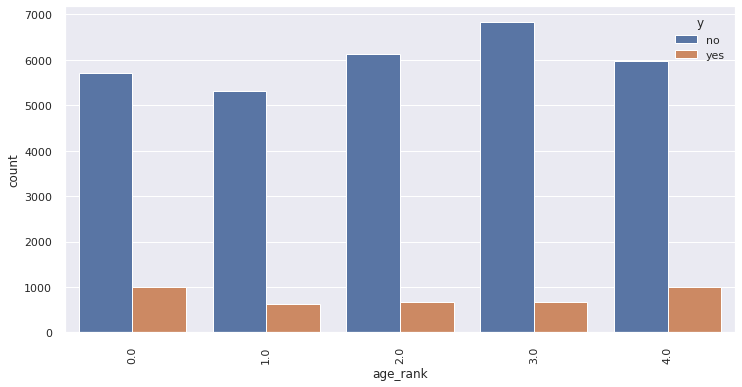

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_1,x= "age_rank",hue='y')
plt.xticks(rotation='vertical')
plt.show()

#### Making customize groups

##### Customize Group 1

In [ ]:
def age_group(age):
    if age<31:
        return 'young'
    elif age<51:
        return 'middle'
    else:
        return 'senior'

In [ ]:
train_1['age_group_cat']=train_1['age'].map(age_group)

In [ ]:
train_1[['age',"age_group_cat"]].head()

,age,age_group_cat
0,58,senior
1,51,senior
2,50,middle
3,27,young
4,38,middle


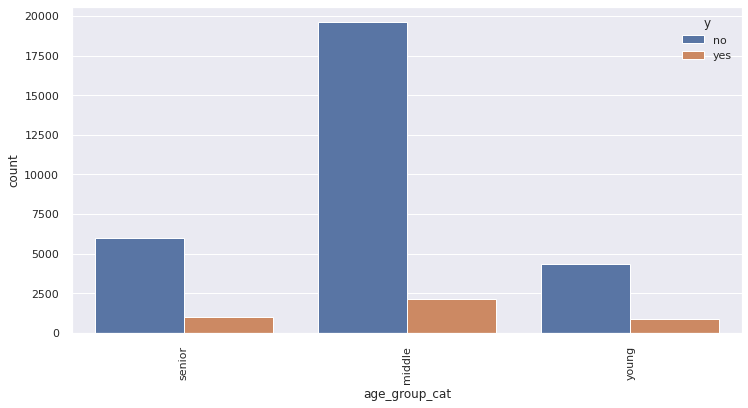

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_1,x= "age_group_cat",hue='y')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
count_table_with_target("age_group_cat", data = train_1)

AGE_GROUP_CAT
y                     no        yes
age_group_cat                      
middle         90.201132   9.798868
senior         85.780014  14.219986
young          83.754305  16.245695




##### Customize group 2

In [ ]:
train_1.loc[train_1["age"] < 30,  'age_group_num'] = 20
train_1.loc[(train_1["age"] >= 30) & (train_1["age"] <= 39), 'age_group_num'] = 30
train_1.loc[(train_1["age"] >= 40) & (train_1["age"] <= 49), 'age_group_num'] = 40
train_1.loc[(train_1["age"] >= 50) & (train_1["age"] <= 59), 'age_group_num'] = 50
train_1.loc[train_1["age"] >= 60, 'age_group_num'] = 60

In [ ]:
train_1[['age',"age_group_num"]].head()

,age,age_group_num
0,58,50.0
1,51,50.0
2,50,50.0
3,27,20.0
4,38,30.0


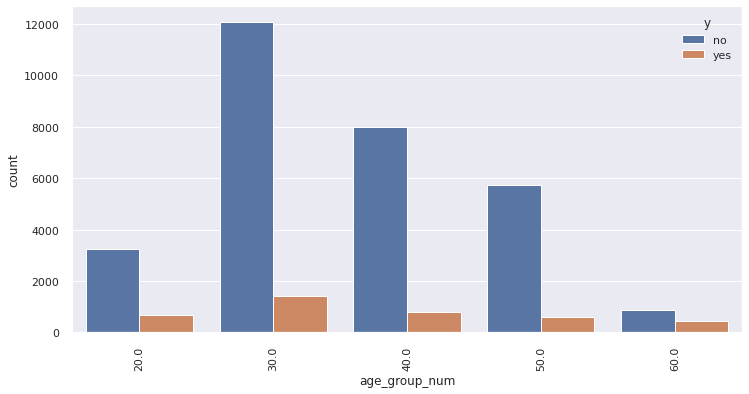

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_1,x= "age_group_num",hue='y')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
count_table_with_target("age_group_num", data = train_1)

AGE_GROUP_NUM
y                     no        yes
age_group_num                      
20.0           82.537656  17.462344
30.0           89.382625  10.617375
40.0           90.892553   9.107447
50.0           90.788434   9.211566
60.0           65.499255  34.500745




### 8.1.2 Age Outlier Treatment

In [ ]:
# Define a function to treat outliers of a numeric column
def treat_outliers(col):
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    col[col > upper] = upper
    col[col < lower] = lower
    return col

In [ ]:
train_1.age.describe()

count    33908.000000
mean        40.966763
std         10.613701
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
# for z score method
train_1[train_1.age >= 70].shape[0], train_1[train_1.age <= 10].shape[0]  

(409, 0)

In [ ]:
# for percentile method
print(train_1['age'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['age'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.age >= 56].shape[0], train_1[train_1.age <= 29].shape[0] 

56.0
29.0


(3668, 3917)

IQR Method

In [ ]:
train_1["age_without_outlier"] = train_1["age"]

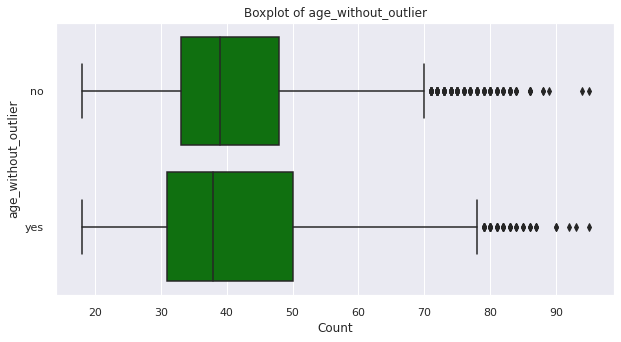

In [ ]:
plot_boxplot("age_without_outlier", data = train_1)

In [ ]:
# # Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["age_without_outlier"] = treat_outliers(train_1["age_without_outlier"])
# df_1["age_without_outlier"] = treat_outliers(df_1["age_without_outlier"])

# Join the datasets back together
# df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

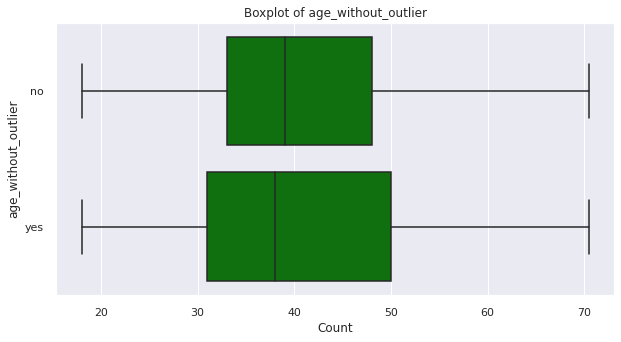

In [ ]:
plot_boxplot("age_without_outlier", data = train_1)

why: 

In [ ]:
train_1.shape, train_1.columns

((33908, 21),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y', 'age_rank', 'age_group_cat',
        'age_group_num', 'age_without_outlier'],
       dtype='object'))

### 8.1.3 Job Feature Treatment

Unknown Class Treatment

In [ ]:
train_1["job_without_unknown"] = train_1["job"]

In [ ]:
train_1.job_without_unknown.unique()

array(['retired', 'blue-collar', 'management', 'admin.', 'self-employed',
       'technician', 'entrepreneur', 'housemaid', 'services',
       'unemployed', 'student', 'unknown'], dtype=object)

In [ ]:
train_1.job_without_unknown.mode()

0    blue-collar
Name: job_without_unknown, dtype: object

In [ ]:
len(train_1[train_1.job_without_unknown == "blue-collar"])

7250

In [ ]:
test.job.value_counts()

blue-collar      2482
management       2315
technician       1873
admin.           1311
services         1050
retired           587
entrepreneur      377
self-employed     369
unemployed        322
housemaid         306
student           239
unknown            72
Name: job, dtype: int64

In [ ]:
def job_new(job):
    if job == "unknown":
        return 'blue-collar'
    else:
      return job

In [ ]:
train_1['job_without_unknown']=train_1['job_without_unknown'].map(job_new)

In [ ]:
train_1.job_without_unknown.unique()

array(['retired', 'blue-collar', 'management', 'admin.', 'self-employed',
       'technician', 'entrepreneur', 'housemaid', 'services',
       'unemployed', 'student'], dtype=object)

In [ ]:
train_1.shape

(33908, 22)

### 8.2.4 Education Feature Treatment

Unknown Class Treatment

In [ ]:
train_1["education_without_unknown"] = train_1["education"]

In [ ]:
train_1.education_without_unknown.unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [ ]:
train_1.education_without_unknown.mode()

0    secondary
Name: education_without_unknown, dtype: object

In [ ]:
train_1.education_without_unknown.value_counts()

secondary    17346
tertiary     10079
primary       5098
unknown       1385
Name: education_without_unknown, dtype: int64

In [ ]:
len(train_1[train_1.education_without_unknown == "secondary"])

17346

In [ ]:
test.education.value_counts()

secondary    5856
tertiary     3222
primary      1753
unknown       472
Name: education, dtype: int64

In [ ]:
def education_new(education):
    if education == "unknown":
        return 'secondary'
    else:
        return education

In [ ]:
train_1['education_without_unknown']=train_1['education'].map(education_new)

In [ ]:
train_1.education_without_unknown.unique()

array(['secondary', 'primary', 'tertiary'], dtype=object)

In [ ]:
train_1.shape

(33908, 23)

### 8.2.5 Combine Feature- Default, Housing, Loan and Encoding of Default, Housing and Loan variable

In [ ]:
train_1["default"].value_counts()

no     33315
yes      593
Name: default, dtype: int64

In [ ]:
train_1["housing"].value_counts()

yes    18916
no     14992
Name: housing, dtype: int64

In [ ]:
train_1["loan"].value_counts()

no     28472
yes     5436
Name: loan, dtype: int64

In [ ]:
train_1["default"] = train_1["default"].replace("no",0).replace("yes",1) 

In [ ]:
train_1["housing"] = train_1["housing"].replace("no",0).replace("yes",1) 

In [ ]:
train_1["loan"] = train_1["loan"].replace("no",0).replace("yes",1) 

In [ ]:
train_1[["default", "loan","housing"]].head()

,default,loan,housing
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,0


In [ ]:
train_1["Loan_related"] = (train_1["default"]*100) + (train_1["loan"]*10) + (train_1["housing"])

In [ ]:
train_1.Loan_related.value_counts()

1      15421
0      12676
11      3183
10      2035
101      215
100      160
110      121
111       97
Name: Loan_related, dtype: int64

In [ ]:
train_1["Loan_related"] = train_1["Loan_related"].replace(0,"000").replace(1,"001").replace(11,"011").replace(10,"010") 

In [ ]:
train_1.Loan_related.value_counts()

001    15421
000    12676
011     3183
010     2035
101      215
100      160
110      121
111       97
Name: Loan_related, dtype: int64

In [ ]:
train_1.Loan_related.astype(str)
train_1.Loan_related.dtype

dtype('O')

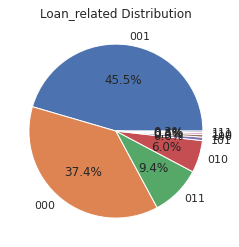

In [ ]:
plot_piechart(train_1,"Loan_related")

In [ ]:
train_1.shape

(33908, 24)

### 8.2.6 New Feature- Week

In [ ]:
def week(day):
    if day<8:
        return 'Week1'
    elif day<15:
        return 'Week2'
    elif day<22:
        return 'Week3'
    else:
        return 'Week4'

In [ ]:
train_1['week']=train_1['day'].map(week)

In [ ]:
train_1[["day","week"]].head()

,day,week
0,3,Week1
1,11,Week2
2,18,Week3
3,5,Week1
4,12,Week2


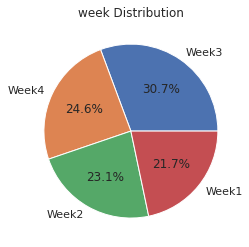

In [ ]:
plot_piechart(train_1,"week")

In [ ]:
train_1.shape

(33908, 25)

### 8.2.7 Contact Feature Treatment

Unknown class Treatment

In [ ]:
def contact_new(contact):
    if contact == "unknown":
        return 'others'
    else:
        return contact

In [ ]:
train_1['contact']=train_1['contact'].map(contact_new)

In [ ]:
train_1.contact.value_counts()

cellular     21994
others        9750
telephone     2164
Name: contact, dtype: int64

### 8.2.8 Balance Feature Treatment

In [ ]:
train_1.balance.describe()

count     33908.000000
mean       1370.713136
std        3111.689069
min       -8019.000000
25%          74.000000
50%         450.000000
75%        1430.000000
max      102127.000000
Name: balance, dtype: float64

#### Convert into categorical

In [ ]:
def bal_group(balance):
    if balance<25:
        return 'low_bal'
    elif balance<500:
        return 'medium_bal'
    elif balance<2000:
        return 'high_bal'
    else:
        return 'very_high_bal'

In [ ]:
train_1["balance_group"] = train_1["balance"].map(bal_group)

In [ ]:
train_1["balance_group"].value_counts()

medium_bal       10875
high_bal          9796
low_bal           6849
very_high_bal     6388
Name: balance_group, dtype: int64

#### Using Quantile Binning

In [ ]:
disc=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
disc.fit(train_1[['balance']])
train_1['balance_rank']=disc.transform(train_1[['balance']])
disc.bin_edges_

array([array([-8.01900e+03,  0.00000e+00,  2.30000e+01,  1.33000e+02,
               2.76000e+02,  4.50000e+02,  7.03000e+02,  1.12900e+03,
               1.86600e+03,  3.57630e+03,  1.02127e+05])             ],
      dtype=object)

In [ ]:
train_1[["balance","balance_rank"]].head()

,balance,balance_rank
0,166,3.0
1,2995,8.0
2,569,5.0
3,73,2.0
4,6447,9.0


In [ ]:
train_1.shape

(33908, 27)

### 8.2.9 Balance Outlier Treatment

In [ ]:
train_1.balance.describe()

count     33908.000000
mean       1370.713136
std        3111.689069
min       -8019.000000
25%          74.000000
50%         450.000000
75%        1430.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
# for z score method
train_1[train_1.balance >= 10703].shape[0], train_1[train_1.balance <= -7963].shape[0]  

(546, 1)

In [ ]:
# for percentile method
print(train_1['balance'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['balance'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.balance >= 3576].shape[0], train_1[train_1.balance <= 0].shape[0] 

3576.2999999999993
0.0


(3394, 5428)

IQR Method

In [ ]:
train_1["balance_without_outlier"] = train_1["balance"]

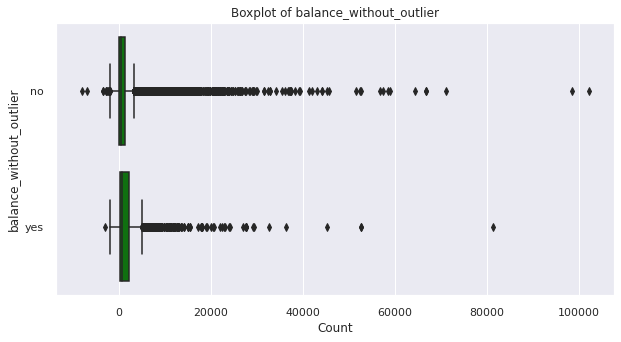

In [ ]:
plot_boxplot("balance_without_outlier", data = train_1)

In [ ]:
# Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["balance_without_outlier"] = treat_outliers(train_1["balance_without_outlier"])
# df_1["balance_without_outlier"] = treat_outliers(df_1["balance_without_outlier"])

# Join the datasets back together
# df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

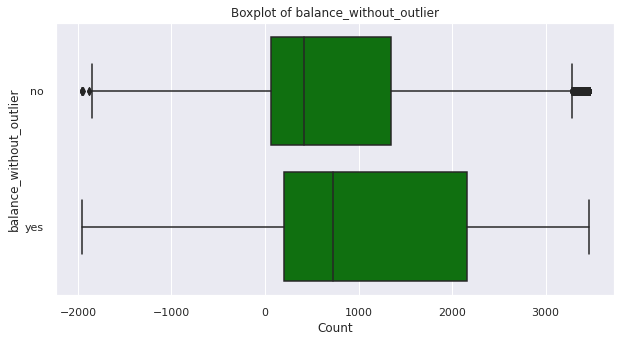

In [ ]:
plot_boxplot("balance_without_outlier", data = train_1)

In [ ]:
train_1.shape, train_1.columns

((33908, 28),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y', 'age_rank', 'age_group_cat',
        'age_group_num', 'age_without_outlier', 'job_without_unknown',
        'education_without_unknown', 'Loan_related', 'week', 'balance_group',
        'balance_rank', 'balance_without_outlier'],
       dtype='object'))

### 8.2.10 Duration Feature Treatment

In [ ]:
# convert duration into minutes
train_1['duration']=train_1['duration']/60

In [ ]:
train_1.duration.nunique()

1469

#### Convert into Categorical

In [ ]:
def call_time(duration):
    if duration<=1:
        return 'less than 1min'
    elif duration<=3:
        return '1-3 min'
    elif duration<=10:
        return '3-10 min'
    else:
        return 'more than 10 min'

In [ ]:
train_1['duration_group']=train_1['duration'].map(call_time)

In [ ]:
train_1.duration_group.value_counts()

3-10 min            14050
1-3 min             13479
less than 1min       3554
more than 10 min     2825
Name: duration_group, dtype: int64

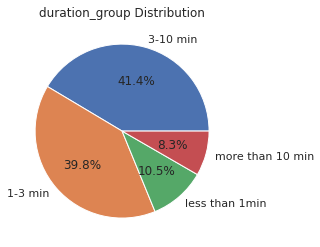

In [ ]:
plot_piechart(train_1,"duration_group")

#### Using Quantile Binning Method

In [ ]:
disc=KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
disc.fit(train_1[['duration']])
train_1['duration_rank']=disc.transform(train_1[['duration']])
disc.bin_edges_

array([array([ 0.        ,  1.48333333,  2.45      ,  3.71666667,  6.13333333,
              81.96666667])                                                   ],
      dtype=object)

In [ ]:
train_1[["duration","duration_rank"]].head()

,duration,duration_rank
0,3.516667,2.0
1,1.550000,1.0
2,7.533333,4.0
3,2.333333,1.0
4,4.933333,3.0


In [ ]:
train_1.shape

(33908, 30)

### 8.2.11 Duration Outlier Treatment

In [ ]:
train_1.duration.describe()

count    33908.000000
mean         4.298320
std          4.310118
min          0.000000
25%          1.716667
50%          2.983333
75%          5.300000
max         81.966667
Name: duration, dtype: float64

In [ ]:
# for z score method
train_1[train_1.duration >= 16].shape[0], train_1[train_1.duration <= -8].shape[0]  

(875, 0)

In [ ]:
# for percentile method
print(train_1['duration'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['duration'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.duration >= 9.05].shape[0], train_1[train_1.duration <= 0.98].shape[0] 

9.05
0.9833333333333333


(3404, 3379)

IQR Method

In [ ]:
train_1["duration_without_outlier"] = train_1["duration"]

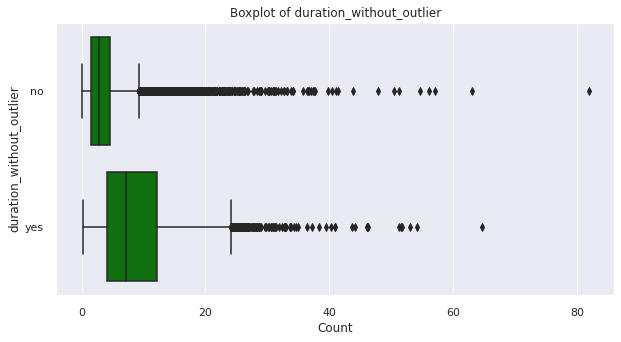

In [ ]:
plot_boxplot("duration_without_outlier", data = train_1)

In [ ]:
# Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["duration_without_outlier"] = treat_outliers(train_1["duration_without_outlier"])
# df_1["duration_without_outlier"] = treat_outliers(df_1["duration_without_outlier"])

# Join the datasets back together
df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

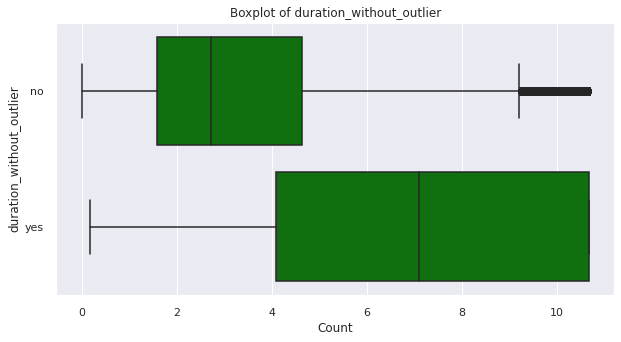

In [ ]:
plot_boxplot("duration_without_outlier", data = train_1)

In [ ]:
train_1.shape

(33908, 31)

### 8.2.12 Outlier Treatment of Campaign, pdays, previous

#### Campaign

In [ ]:
train_1.campaign.describe()

count    33908.000000
mean         2.752920
std          3.068299
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [ ]:
# for z score method
train_1[train_1.campaign >= 11].shape[0], train_1[train_1.campaign <= -7].shape[0]  

(872, 0)

In [ ]:
# for percentile method
print(train_1['campaign'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['campaign'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.campaign >= 5].shape[0], train_1[train_1.campaign <= 1].shape[0] 

5.0
1.0


(4550, 13162)

IQR Method

In [ ]:
train_1["campaign_without_outlier"] = train_1["campaign"]

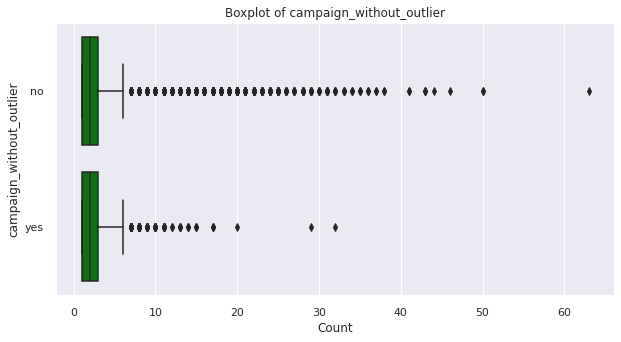

In [ ]:
plot_boxplot("campaign_without_outlier", data = train_1)

In [ ]:
# Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["campaign_without_outlier"] = treat_outliers(train_1["campaign_without_outlier"])
# df_1["campaign_without_outlier"] = treat_outliers(df_1["campaign_without_outlier"])

# Join the datasets back together
# df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

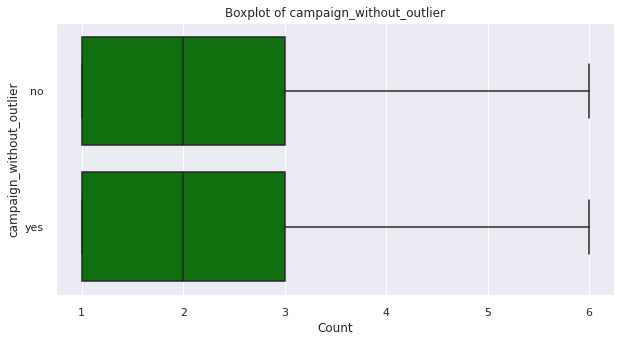

In [ ]:
plot_boxplot("campaign_without_outlier", data = train_1)

In [ ]:
train_1.shape

(33908, 32)

#### pdays

In [ ]:
train_1.pdays.describe()

count    33908.000000
mean        40.168515
std         99.892114
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
# for z score method
train_1[train_1.pdays >= 337].shape[0], train_1[train_1.pdays <= -257].shape[0]  

(1374, 0)

In [ ]:
# for percentile method
print(train_1['pdays'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['pdays'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.pdays >= 185].shape[0], train_1[train_1.pdays <= -1].shape[0] 

185.0
-1.0


(3416, 27707)

IQR Method

In [ ]:
train_1["pdays_without_outlier"] = train_1["pdays"]

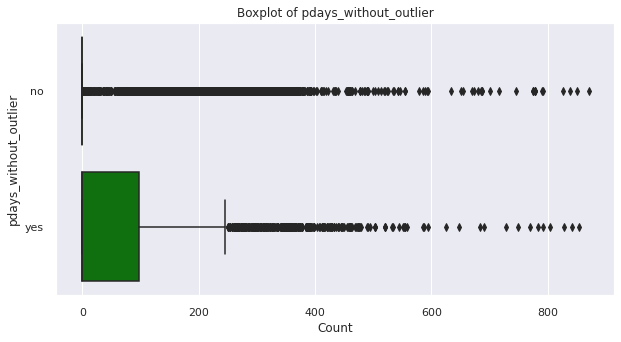

In [ ]:
plot_boxplot("pdays_without_outlier", data = train_1)

In [ ]:
# Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["pdays_without_outlier"] = treat_outliers(train_1["pdays_without_outlier"])
# df_1["pdays_without_outlier"] = treat_outliers(df_1["pdays_without_outlier"])

# Join the datasets back together
# df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

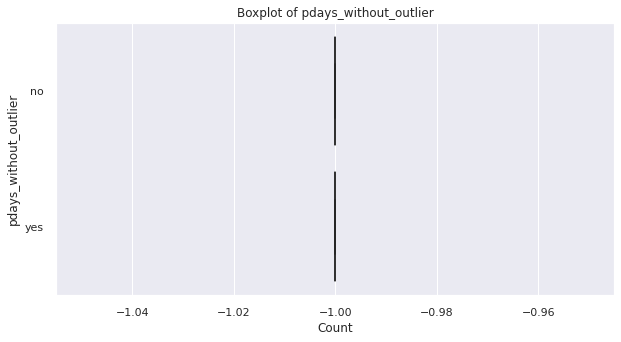

In [ ]:
plot_boxplot("pdays_without_outlier", data = train_1)

In [ ]:
train_1.shape

(33908, 33)

#### previous

In [ ]:
train_1.previous.describe()

count    33908.000000
mean         0.581987
std          2.412482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [ ]:
len(train_1[train_1.previous>=274])

1

In [ ]:
train_1 = train_1.drop((train_1[train_1.previous>=274]).index)
# extreme value in dataset

In [ ]:
train_1.shape

(33907, 33)

In [ ]:
# for z score method
train_1[train_1.previous >= 8].shape[0], train_1[train_1.previous <= -7].shape[0]  

(435, 0)

In [ ]:
# for percentile method
print(train_1['previous'].quantile(q=[0.1, 0.9])[0.9])
print(train_1['previous'].quantile(q=[0.1, 0.9])[0.1])
train_1[train_1.previous >= 2].shape[0], train_1[train_1.previous <= 0].shape[0] 

2.0
0.0


(4116, 27707)

IQR Method

In [ ]:
train_1["previous_without_outlier"] = train_1["previous"]

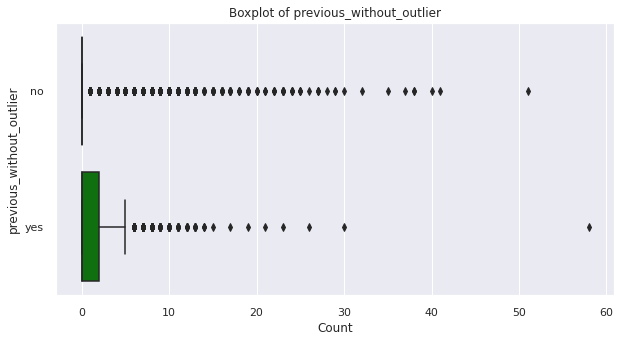

In [ ]:
plot_boxplot("previous_without_outlier", data = train_1)

In [ ]:
# Split the dataset by the binary target variable
# df_0 = train_1[train_1['y'] == "no"]
# df_1 = train_1[train_1['y'] == "yes"]


# Treat outliers of the numeric columns for each class
train_1["previous_without_outlier"] = treat_outliers(train_1["previous_without_outlier"])
# df_1["previous_without_outlier"] = treat_outliers(df_1["previous_without_outlier"])

# Join the datasets back together
# df_clean = pd.concat([df_0, df_1])

In [ ]:
# train_1 = df_clean.copy()

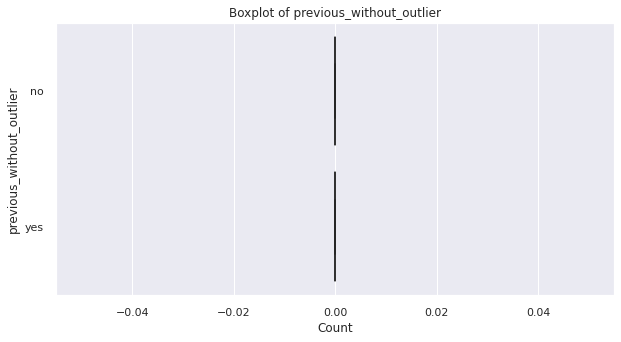

In [ ]:
plot_boxplot("previous_without_outlier", data = train_1)

In [ ]:
train_1.shape

(33907, 34)

### 8.2.13 Customer - new column 

In [ ]:
train_1['customer']=train_1['pdays'].apply(lambda x:'new' if x==-1 else 'old')

In [ ]:
train_1.customer.value_counts()

new    27707
old     6200
Name: customer, dtype: int64

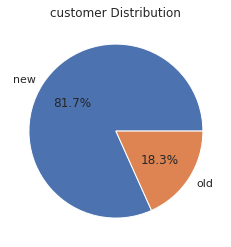

In [ ]:
plot_piechart(train_1, "customer")

## 8.3 Data Normalization

In [ ]:
train_1.dtypes

age                            int64
job                           object
marital                       object
education                     object
default                        int64
balance                        int64
housing                        int64
loan                           int64
contact                       object
day                            int64
month                         object
duration                     float64
campaign                       int64
pdays                          int64
previous                       int64
poutcome                      object
y                             object
age_rank                     float64
age_group_cat                 object
age_group_num                float64
age_without_outlier          float64
job_without_unknown           object
education_without_unknown     object
Loan_related                  object
week                          object
balance_group                 object
balance_rank                 float64
b

In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33907 entries, 0 to 33907
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        33907 non-null  int64  
 1   job                        33907 non-null  object 
 2   marital                    33907 non-null  object 
 3   education                  33907 non-null  object 
 4   default                    33907 non-null  int64  
 5   balance                    33907 non-null  int64  
 6   housing                    33907 non-null  int64  
 7   loan                       33907 non-null  int64  
 8   contact                    33907 non-null  object 
 9   day                        33907 non-null  int64  
 10  month                      33907 non-null  object 
 11  duration                   33907 non-null  float64
 12  campaign                   33907 non-null  int64  
 13  pdays                      33907 non-null  int

In [ ]:
train_1_num = ["age","balance","day","duration","campaign","pdays","previous","age_without_outlier","balance_without_outlier","duration_without_outlier","campaign_without_outlier","pdays_without_outlier","previous_without_outlier"]

In [ ]:
scaler = MinMaxScaler()
train_1[train_1_num] = scaler.fit_transform(train_1[train_1_num])

In [ ]:
print(train_1.head())

        age            job   marital  education  default   balance  housing  \
0  0.519481        retired   married  secondary        0  0.074310        0   
1  0.428571    blue-collar   married    primary        0  0.099995        1   
2  0.415584     management   married   tertiary        0  0.077969        0   
3  0.116883         admin.   married  secondary        0  0.073466        1   
4  0.259740  self-employed  divorced   tertiary        0  0.131335        0   

   loan   contact       day  ...  balance_group  balance_rank  \
0     1    others  0.066667  ...     medium_bal           3.0   
1     0    others  0.333333  ...  very_high_bal           8.0   
2     1  cellular  0.566667  ...       high_bal           5.0   
3     0  cellular  0.133333  ...     medium_bal           2.0   
4     0  cellular  0.366667  ...  very_high_bal           9.0   

   balance_without_outlier  duration_group  duration_rank  \
0                 0.391962        3-10 min            2.0   
1           

## 8.4 Encoding

As there are many ordinal columns so I encode them with manually by replace function

In [ ]:
train_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_rank', 'age_group_cat',
       'age_group_num', 'age_without_outlier', 'job_without_unknown',
       'education_without_unknown', 'Loan_related', 'week', 'balance_group',
       'balance_rank', 'balance_without_outlier', 'duration_group',
       'duration_rank', 'duration_without_outlier', 'campaign_without_outlier',
       'pdays_without_outlier', 'previous_without_outlier', 'customer'],
      dtype='object')

In [ ]:
train_1.education_without_unknown.value_counts()

secondary    18731
tertiary     10078
primary       5098
Name: education_without_unknown, dtype: int64

In [ ]:
train_1.Loan_related.dtypes

dtype('O')

In [ ]:
train_1.job = train_1.job.replace("blue-collar",0).replace("management",1).replace("technician",2).replace("admin.",3).replace("services",4).replace("retired",5).replace("self-employed",6).replace("entrepreneur",7).replace("unemployed",8).replace("housemaid",9).replace("student",10).replace("unknown",11)
train_1.marital = train_1.marital.replace("married",0).replace("single",1).replace("divorced",2)
train_1.education = train_1.education.replace("tertiary",0).replace("secondary",1).replace("primary",2).replace("unknown",3)
train_1.contact = train_1.contact.replace("cellular",0).replace("telephone",1).replace("others",2)
train_1.month = train_1.month.replace("jan",0).replace("feb",1).replace("mar",2).replace("apr",3).replace("may",4).replace("jun",5).replace("jul",6).replace("aug",7).replace("sep",8).replace("oct",9).replace("nov",10).replace("dec",11)
train_1.poutcome = train_1.poutcome.replace("success",0).replace("failure",1).replace("other",2).replace("unknown",3)
train_1.y = train_1.y.replace("no",1).replace("yes",0)
train_1.age_group_cat = train_1.age_group_cat.replace("young",0).replace("middle",1).replace("senior",2)
train_1.job_without_unknown = train_1.job_without_unknown.replace("blue-collar",0).replace("management",1).replace("technician",2).replace("admin.",3).replace("services",4).replace("retired",5).replace("self-employed",6).replace("entrepreneur",7).replace("unemployed",8).replace("housemaid",9).replace("student",10)
train_1.Loan_related = train_1.Loan_related.replace("000",0).replace("001",1).replace("010",2).replace("011",3).replace("100",4).replace("101",5).replace("110",6).replace("111",7)
train_1.week = train_1.week.replace("Week1",0).replace("Week2",1).replace("Week3",2).replace("Week4",3)
train_1.balance_group = train_1.balance_group.replace("very_high_bal",0).replace("high_bal",1).replace("medium_bal",2).replace("low_bal",3)
train_1.duration_group = train_1.duration_group.replace("less than 1min",0).replace("1-3 min",1).replace("3-10 min",2).replace("more than 10 min",3)
train_1.customer = train_1.customer.replace("new",0).replace("old",1)
train_1.education_without_unknown = train_1.education_without_unknown.replace("tertiary",0).replace("secondary",1).replace("primary",2)

In [ ]:
train_1.dtypes

age                          float64
job                            int64
marital                        int64
education                      int64
default                        int64
balance                      float64
housing                        int64
loan                           int64
contact                        int64
day                          float64
month                          int64
duration                     float64
campaign                     float64
pdays                        float64
previous                     float64
poutcome                       int64
y                              int64
age_rank                     float64
age_group_cat                  int64
age_group_num                float64
age_without_outlier          float64
job_without_unknown            int64
education_without_unknown      int64
Loan_related                   int64
week                           int64
balance_group                  int64
balance_rank                 float64
b

## 8.5 Multicolineraity

<Axes: >

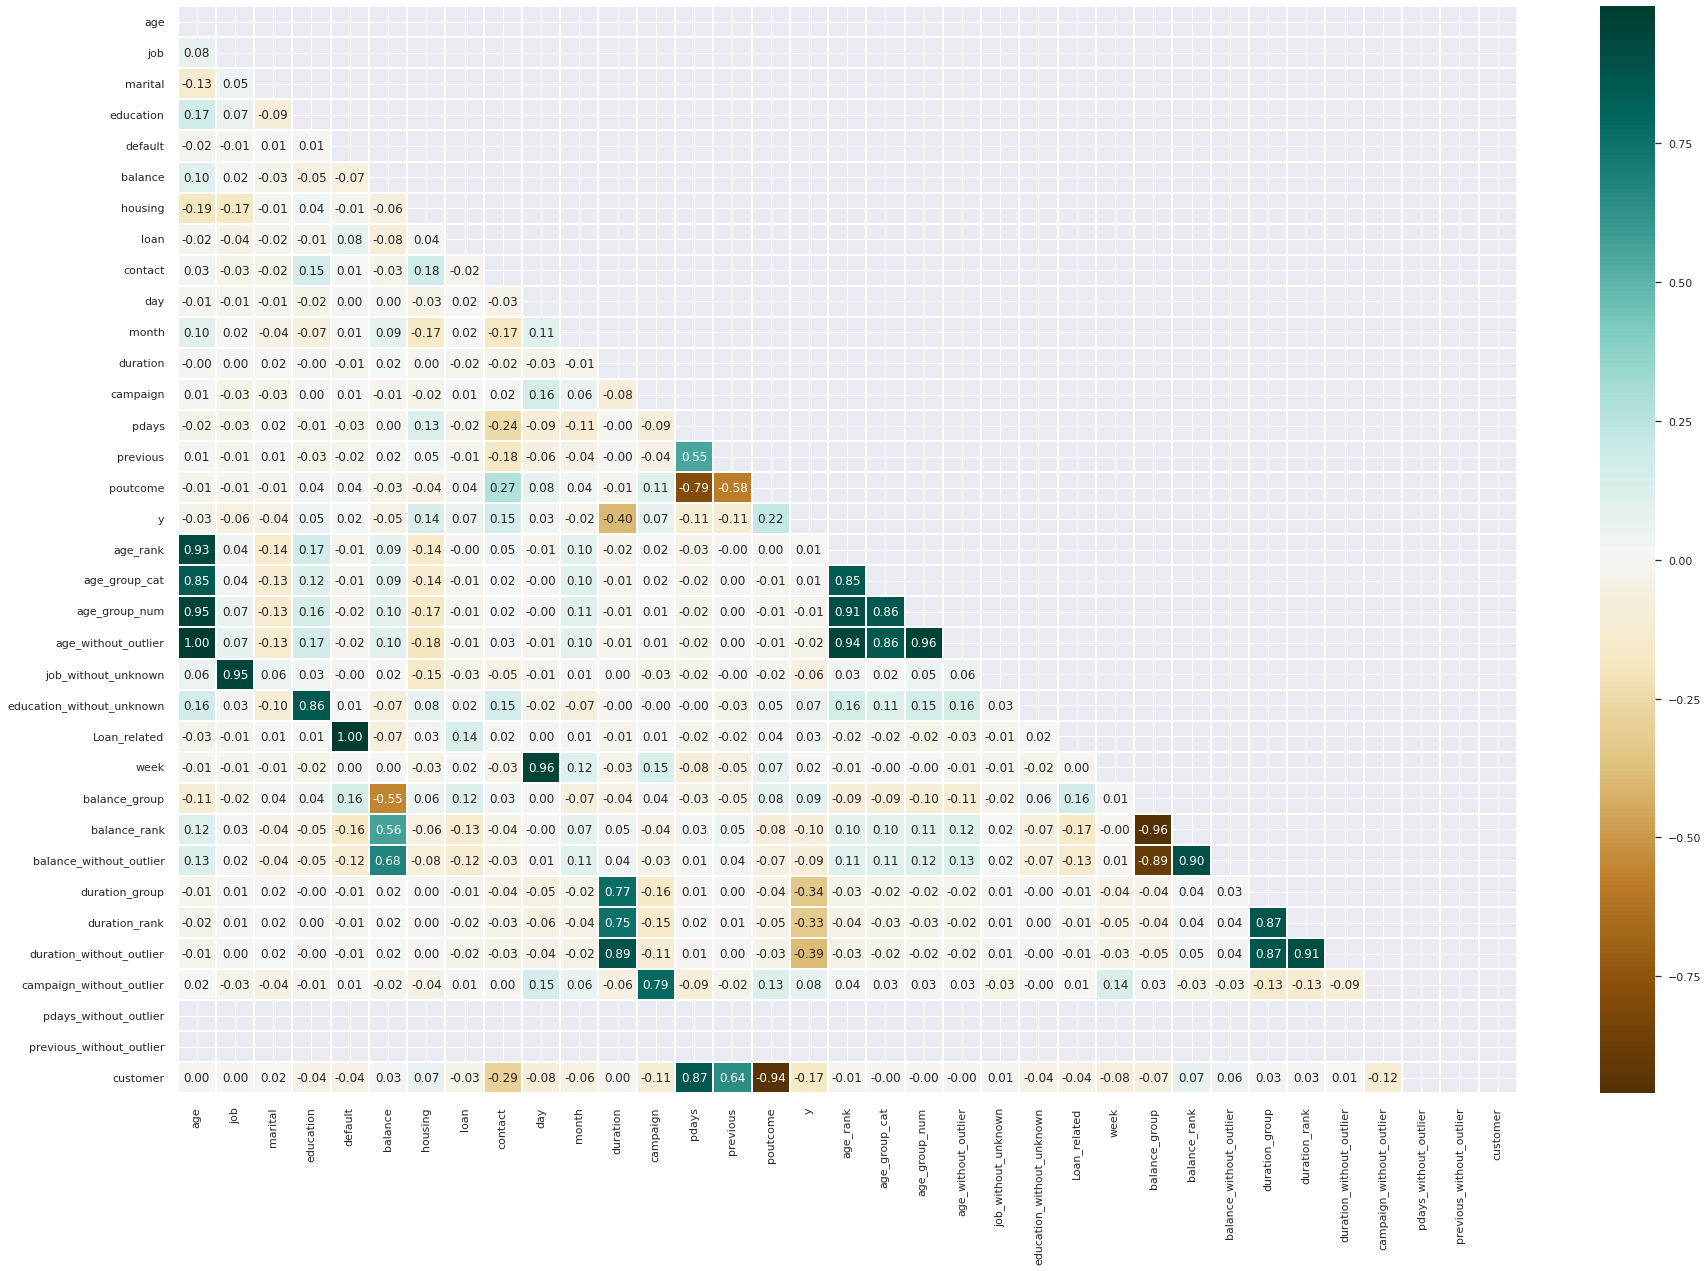

In [ ]:
matrix = np.triu(train_1.corr())
plt.figure(figsize=(30,20))
sns.heatmap(train_1.corr(), annot=True, fmt= '.2f', cmap='BrBG', linewidths = 2,mask=matrix)

In [ ]:
# Method : Variance Inflation Factor (VIF)
X_vif = train_1.drop('y', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
print(vif)

     VIF Factor                   features
0   1154.187280                        age
1     19.715416                        job
2      1.601338                    marital
3      9.830932                  education
4    735.931486                    default
5     19.334652                    balance
6      4.766205                    housing
7      4.439790                       loan
8      1.822779                    contact
9     57.868038                        day
10     6.122217                      month
11    10.797798                   duration
12     3.576626                   campaign
13     5.156012                      pdays
14     1.865345                   previous
15    66.090357                   poutcome
16    33.689342                   age_rank
17    17.461890              age_group_cat
18   171.071243              age_group_num
19  1562.694920        age_without_outlier
20    19.539937        job_without_unknown
21    10.897494  education_without_unknown
22   761.31

## Feature Separation

In [ ]:
X_temp = train_1.drop("y", axis= 1)
y_temp = train_1[["y"]]

## Treatment of Imbalanced Dataset

SMOTE for imbalanced (oversampling)

In [ ]:
X_temp, y_temp = SMOTE().fit_resample(X_temp, y_temp)

## Train - Test Split

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

## Feature Importance

By Permutation Importance for feature importance

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_temp, y_train_temp)
y_pred_temp = model.predict(X_test_temp)
baseline_accuracy = accuracy_score(y_test_temp, y_pred_temp)
print(f"Baseline accuracy: {baseline_accuracy}")
result = permutation_importance(model, X_test_temp, y_test_temp, n_repeats=10, random_state=42, n_jobs=-1)
importance = result.importances_mean
for i,v in enumerate(importance):
    print(f"Feature {i}: {v}")

Baseline accuracy: 0.9429692718770875
Feature 0: 0.0006930527722110557
Feature 1: 0.0007181028724114414
Feature 2: 0.00035070140280555326
Feature 3: 0.000935203740814916
Feature 4: 0.0
Feature 5: 0.0002338009352036763
Feature 6: 0.0032481629926519153
Feature 7: 0.0009853039412157205
Feature 8: 0.014863059452237759
Feature 9: 0.005527722110888389
Feature 10: 0.01391950567802267
Feature 11: 0.04448062792251164
Feature 12: 0.009243486973947845
Feature 13: 0.004676018704074758
Feature 14: 0.004876419505677965
Feature 15: 0.007907481629926461
Feature 16: 0.0008266533066131565
Feature 17: -0.0005678022712091391
Feature 18: -0.0005761523046092787
Feature 19: -0.0005344021376086028
Feature 20: 0.0007682030728122236
Feature 21: 0.0006429525718102402
Feature 22: 0.002980961923847658
Feature 23: 0.003097862391449524
Feature 24: 0.0006847027388109051
Feature 25: 0.0007849031396125028
Feature 26: 0.0010437541750166535
Feature 27: 0.013810955243820922
Feature 28: 0.07242818971275877
Feature 29: 0.00

if the importance score for feature 1 is 0.05, it means that shuffling the values of feature 1 resulted in a 5% decrease in the model's accuracy. Therefore, feature 1 is considered an important feature for predicting the target variable.

In [ ]:
importance = result.importances_mean
feature_names = X_temp.columns
feature_importance = [(importance[i], feature_names[i]) for i in range(len(importance))]
feature_importance = sorted(feature_importance, reverse=True)
top_n = 15
top_features = [feature_importance[i][1] for i in range(top_n)]
print(f"Top {top_n} features: {top_features}")


Top 15 features: ['duration_rank', 'duration', 'contact', 'month', 'duration_group', 'campaign_without_outlier', 'customer', 'campaign', 'poutcome', 'day', 'previous', 'pdays', 'duration_without_outlier', 'housing', 'week']


## 8.6 Feature Engine

In [ ]:
constant = DropConstantFeatures(tol=1)
constant.fit(X_temp)
len(constant.features_to_drop_)
# show the names of the first 2 constant features

constant.features_to_drop_[0:2]

['pdays_without_outlier', 'previous_without_outlier']

In [ ]:

quasi_constant = DropConstantFeatures(tol=0.998)

quasi_constant.fit(X_temp)

len(constant.features_to_drop_)
quasi_constant.features_to_drop_[0:2]

['pdays_without_outlier', 'previous_without_outlier']

In [ ]:
# remove correlated variables

print('Number of variables before removing correlated: ', X_temp.shape[1])

X_temp = quasi_constant.transform(X_temp)

print('Number of variables after removing correlated: ', X_temp.shape[1])

Number of variables before removing correlated:  34
Number of variables after removing correlated:  32


In [ ]:
duplicates = DropDuplicateFeatures()

duplicates.fit(X_temp)

duplicates.duplicated_feature_sets_

[]

In [ ]:

correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

correlated.fit(X_temp)

correlated.correlated_feature_sets_

[{'age', 'age_group_cat', 'age_group_num', 'age_rank', 'age_without_outlier'},
 {'job', 'job_without_unknown'},
 {'education', 'education_without_unknown'},
 {'Loan_related', 'default'},
 {'day', 'week'},
 {'duration', 'duration_without_outlier'},
 {'campaign', 'campaign_without_outlier'},
 {'customer', 'pdays'},
 {'balance_group', 'balance_rank', 'balance_without_outlier'},
 {'duration_group', 'duration_rank'}]

In [ ]:
len(correlated.features_to_drop_)

14

In [ ]:
smart_corr = SmartCorrelatedSelection(
    variables=None, 
    method="pearson",
    threshold=0.7, 
    missing_values="ignore",
    selection_method="model_performance",
    estimator=ExtraTreesClassifier(n_estimators=10, random_state=1))

# find correlated features and select the best from each group

# the method builds a extra trees classifier using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X_temp, y_temp)

SmartCorrelatedSelection(confirm_variables=False, cv=3,
                         estimator=ExtraTreesClassifier(bootstrap=False,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                                                        oob_score=False,
                                                        random_state=1,
                                                        verbose=0,
                                                        warm_start=False),
                         method='pearson', missing_values='ignore',
                         scoring='roc_auc',
                         selection_method='model_performance', threshold=0.7,
                         variables=None)

In [ ]:
# the correlated feature groups

smart_corr.correlated_feature_sets_

[{'age', 'age_group_cat', 'age_group_num', 'age_rank', 'age_without_outlier'},
 {'job', 'job_without_unknown'},
 {'education', 'education_without_unknown'},
 {'Loan_related', 'default'},
 {'balance', 'balance_without_outlier'},
 {'day', 'week'},
 {'duration', 'duration_group', 'duration_rank', 'duration_without_outlier'},
 {'campaign', 'campaign_without_outlier'},
 {'customer', 'pdays', 'poutcome'},
 {'balance_group', 'balance_rank'}]

In [ ]:
len(smart_corr.features_to_drop_)

16

In [ ]:
# remove correlated variables

print('Number of variables before removing correlated: ', X_temp.shape[1])

X_temp = smart_corr.transform(X_temp)

print('Number of variables after removing correlated: ', X_temp.shape[1])

Number of variables before removing correlated:  32
Number of variables after removing correlated:  16


In [ ]:
X_temp.columns

Index(['job', 'marital', 'housing', 'loan', 'contact', 'day', 'month',
       'campaign', 'pdays', 'previous', 'age_without_outlier',
       'education_without_unknown', 'Loan_related', 'balance_rank',
       'balance_without_outlier', 'duration_without_outlier'],
      dtype='object')

In [ ]:
X_temp.head()

,job,marital,housing,loan,contact,day,month,campaign,pdays,previous,age_without_outlier,education_without_unknown,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier
0,5,0,0,1,2,0.066667,6,0.000000,0.0,0.0,0.761905,1,2,3.0,0.391962,0.329430
1,0,0,1,0,2,0.333333,5,0.016129,0.0,0.0,0.628571,2,1,8.0,0.913532,0.145199
2,1,0,0,1,0,0.566667,7,0.048387,0.0,0.0,0.609524,0,2,5.0,0.466261,0.705699
3,3,0,1,0,0,0.133333,1,0.000000,0.0,0.0,0.171429,1,1,2.0,0.374816,0.218579
4,6,2,0,0,0,0.366667,0,0.000000,0.0,0.0,0.380952,0,0,9.0,1.000000,0.462139


In [ ]:
temp_df = pd.concat([X_temp, y_temp], axis=1)

In [ ]:
temp_df.y.value_counts()

1    29940
0    29940
Name: y, dtype: int64

In [ ]:
# temp_df.head(19)

# 9. Auto ML

In [ ]:
train_3 = temp_df.copy()
target = "y"

In [ ]:
setup(train_3, target=target, session_id=42)
setup_df = pull()

,Description,Value
0,Session id,42
1,Target,y
2,Target type,Binary
3,Original data shape,"(59880, 17)"
4,Transformed data shape,"(59880, 17)"
5,Transformed train set shape,"(41916, 17)"
6,Transformed test set shape,"(17964, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_models = compare_models(n_select=5)
best_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9428,0.9898,0.9443,0.9415,0.9429,0.8856,0.8856,6.3960
lightgbm,Light Gradient Boosting Machine,0.9382,0.9881,0.9317,0.9441,0.9378,0.8764,0.8765,1.7170
rf,Random Forest Classifier,0.9336,0.9858,0.9050,0.9599,0.9316,0.8672,0.8687,7.2500
et,Extra Trees Classifier,0.9303,0.9838,0.8951,0.9629,0.9278,0.8606,0.8628,5.3790
gbc,Gradient Boosting Classifier,0.9095,0.9733,0.8863,0.9294,0.9073,0.8189,0.8198,8.1610
dt,Decision Tree Classifier,0.8968,0.8968,0.8895,0.9027,0.8960,0.7936,0.7937,0.6760
ada,Ada Boost Classifier,0.8802,0.9533,0.8785,0.8816,0.8800,0.7604,0.7605,2.1490
knn,K Neighbors Classifier,0.8583,0.9227,0.8175,0.8901,0.8522,0.7165,0.7190,1.9610
ridge,Ridge Classifier,0.8432,0.0000,0.8183,0.8612,0.8392,0.6863,0.6872,0.1160
lda,Linear Discriminant Analysis,0.8432,0.9085,0.8183,0.8613,0.8392,0.6865,0.6874,0.2500


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               objective='binary:logistic', predictor=None, ...),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split

In [ ]:
from pycaret.classification import *

In [ ]:
xgboost	 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9423,0.9903,0.9365,0.9474,0.9419,0.8845,0.8846
1,0.9382,0.9893,0.9418,0.9351,0.9384,0.8764,0.8765
2,0.9408,0.9894,0.9470,0.9354,0.9412,0.8817,0.8817
3,0.9458,0.9908,0.9509,0.9414,0.9461,0.8917,0.8917
4,0.9418,0.9902,0.9399,0.9435,0.9417,0.8836,0.8836
5,0.9437,0.9896,0.9432,0.9441,0.9437,0.8874,0.8874
6,0.9420,0.9889,0.9461,0.9385,0.9423,0.8840,0.8841
7,0.9406,0.9893,0.9432,0.9383,0.9408,0.8812,0.8812
8,0.9446,0.9891,0.9451,0.9442,0.9447,0.8893,0.8893


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9404,0.9898,0.9256,0.9538,0.9395,0.8807,0.8811
1,0.9382,0.9878,0.9308,0.9448,0.9378,0.8764,0.8765
2,0.9370,0.9880,0.9375,0.9366,0.9371,0.8740,0.8740
3,0.9382,0.9881,0.9365,0.9397,0.9381,0.8764,0.8764
4,0.9389,0.9884,0.9294,0.9475,0.9383,0.8779,0.8780
5,0.9389,0.9879,0.9299,0.9470,0.9384,0.8779,0.8780
6,0.9356,0.9866,0.9284,0.9419,0.9351,0.8712,0.8712
7,0.9341,0.9874,0.9323,0.9358,0.9340,0.8683,0.8683
8,0.9358,0.9874,0.9270,0.9436,0.9352,0.8716,0.8718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9311,0.9854,0.8950,0.9645,0.9285,0.8621,0.8644
1,0.9323,0.9861,0.9055,0.9567,0.9304,0.8645,0.8657
2,0.9370,0.9864,0.9136,0.9585,0.9355,0.8740,0.8750
3,0.9342,0.9869,0.9094,0.9568,0.9325,0.8683,0.8694
4,0.9301,0.9856,0.8989,0.9588,0.9279,0.8602,0.8619
5,0.9332,0.9856,0.9022,0.9619,0.9311,0.8664,0.8681
6,0.9282,0.9827,0.9041,0.9499,0.9264,0.8564,0.8574
7,0.9322,0.9859,0.8998,0.9622,0.9300,0.8645,0.8663
8,0.9353,0.9849,0.9060,0.9625,0.9334,0.8707,0.8722


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tuned_xgboost = tune_model(xgboost)

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9413,0.9907,0.9346,0.9473,0.9409,0.8826,0.8827
1,0.9406,0.9895,0.9470,0.9350,0.9410,0.8812,0.8813
2,0.9418,0.9897,0.9470,0.9372,0.9421,0.8836,0.8836
3,0.9430,0.9906,0.9461,0.9403,0.9432,0.8860,0.8860
4,0.9423,0.9905,0.9423,0.9423,0.9423,0.8845,0.8845
5,0.9427,0.9895,0.9427,0.9427,0.9427,0.8855,0.8855
6,0.9418,0.9882,0.9466,0.9376,0.9421,0.8836,0.8836
7,0.9387,0.9888,0.9456,0.9327,0.9391,0.8774,0.8774
8,0.9408,0.9890,0.9442,0.9379,0.9410,0.8817,0.8817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# tuned_rf = tune_model(rf)

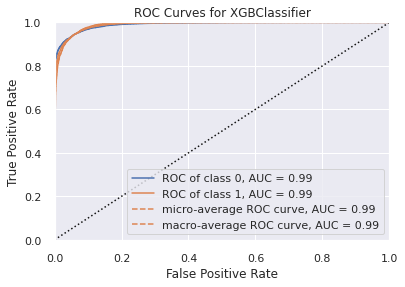

In [ ]:
plot_model(xgboost, plot = 'auc')

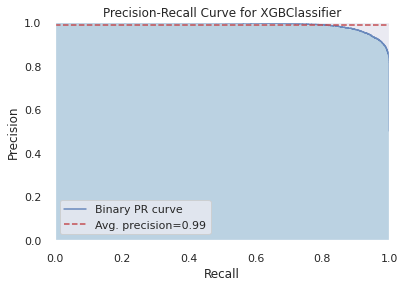

In [ ]:
plot_model(xgboost, plot = 'pr')

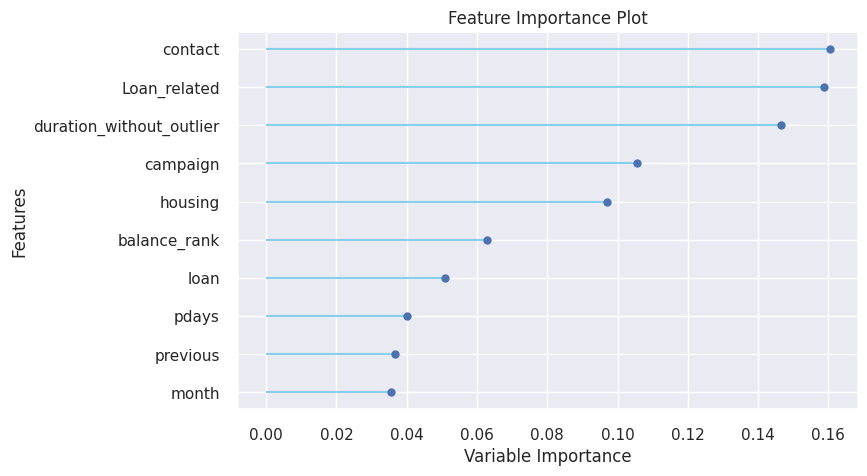

In [ ]:
plot_model(xgboost, plot='feature')

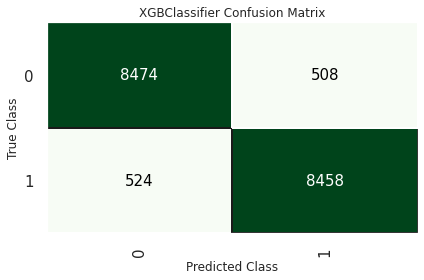

In [ ]:
plot_model(xgboost, plot = 'confusion_matrix')

In [ ]:
# evaluate_model(xgboost)

In [ ]:
blended_model = blend_models(estimator_list=[xgboost,tuned_lightgbm,rf], optimize='F1')
results_df = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9918,0.9284,0.9591,0.9435,0.8888,0.8893
1,0.9470,0.9908,0.9423,0.9513,0.9468,0.8941,0.8941
2,0.9451,0.9912,0.9394,0.9503,0.9448,0.8903,0.8903
3,0.9506,0.9922,0.9461,0.9547,0.9504,0.9012,0.9013
4,0.9482,0.9916,0.9389,0.9567,0.9477,0.8965,0.8966
5,0.9454,0.9910,0.9351,0.9547,0.9448,0.8907,0.8909
6,0.9430,0.9894,0.9370,0.9483,0.9426,0.8859,0.8860
7,0.9461,0.9908,0.9389,0.9526,0.9457,0.8922,0.8922
8,0.9449,0.9905,0.9394,0.9498,0.9446,0.8898,0.8898


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# stacked_model = stack_models([xgboost,tuned_lightgbm,rf])

In [ ]:
finalized_blended_model = finalize_model(blended_model)
predictions = predict_model(finalized_blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9842,0.9991,0.9870,0.9816,0.9843,0.9685,0.9685


In [ ]:
train_3.head()

,job,marital,housing,loan,contact,day,month,campaign,pdays,previous,age_without_outlier,education_without_unknown,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier,y
0,5,0,0,1,2,0.066667,6,0.000000,0.0,0.0,0.761905,1,2,3.0,0.391962,0.329430,1
1,0,0,1,0,2,0.333333,5,0.016129,0.0,0.0,0.628571,2,1,8.0,0.913532,0.145199,1
2,1,0,0,1,0,0.566667,7,0.048387,0.0,0.0,0.609524,0,2,5.0,0.466261,0.705699,1
3,3,0,1,0,0,0.133333,1,0.000000,0.0,0.0,0.171429,1,1,2.0,0.374816,0.218579,1
4,6,2,0,0,0,0.366667,0,0.000000,0.0,0.0,0.380952,0,0,9.0,1.000000,0.462139,1


In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other


In [ ]:
test_1 = test.copy()

In [ ]:
test_1.job = test_1.job.replace("blue-collar",0).replace("management",1).replace("technician",2).replace("admin.",3).replace("services",4).replace("retired",5).replace("self-employed",6).replace("entrepreneur",7).replace("unemployed",8).replace("housemaid",9).replace("student",10).replace("unknown",11)
test_1.marital = test_1.marital.replace("married",0).replace("single",1).replace("divorced",2)
test_1["housing"] = test_1["housing"].replace("no",0).replace("yes",1) 
test_1["loan"] = test_1["loan"].replace("no",0).replace("yes",1)
test_1.month = test_1.month.replace("jan",0).replace("feb",1).replace("mar",2).replace("apr",3).replace("may",4).replace("jun",5).replace("jul",6).replace("aug",7).replace("sep",8).replace("oct",9).replace("nov",10).replace("dec",11)

#contact_without_unknown
test_1['contact']=test_1['contact'].map(contact_new)
test_1.contact = test_1.contact.replace("cellular",0).replace("telephone",1).replace("others",2)

#age without outlier
test_1["age_without_outlier"] = test_1["age"]
test_1["age_without_outlier"] = treat_outliers(test_1["age_without_outlier"])

#loan related
test_1["default"] = test_1["default"].replace("no",0).replace("yes",1)
test_1["Loan_related"] = (test_1["default"]*100) + (test_1["loan"]*10) + (test_1["housing"])
test_1["Loan_related"] = test_1["Loan_related"].replace(0,"000").replace(1,"001").replace(11,"011").replace(10,"010") 
test_1.Loan_related.astype(str)
test_1.Loan_related = test_1.Loan_related.replace("000",0).replace("001",1).replace("010",2).replace("011",3).replace("100",4).replace("101",5).replace("110",6).replace("111",7)

#balance rank
disc=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
disc.fit(test_1[['balance']])
test_1['balance_rank']=disc.transform(test_1[['balance']])
disc.bin_edges_

#balance without outlier
test_1["balance_without_outlier"] = test_1["balance"]
test_1["balance_without_outlier"] = treat_outliers(test_1["balance_without_outlier"])

#duration without outlier
test_1["duration_without_outlier"] = test_1["duration"]
test_1["duration_without_outlier"] = treat_outliers(test_1["duration_without_outlier"])

#education_without_unknown
test_1['education_without_unknown']=test_1['education'].map(education_new)
test_1.education_without_unknown = test_1.education_without_unknown.replace("tertiary",0).replace("secondary",1).replace("primary",2)

# Min Max scaling
lst2 = ["day","campaign","pdays", "previous","age_without_outlier","balance_without_outlier","duration_without_outlier"]
test_1[lst2] = scaler.fit_transform(test_1[lst2])

In [ ]:
test_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,age_without_outlier,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier,education_without_unknown
0,41,1,0,tertiary,0,6060,1,0,2,0.466667,...,0.017544,0.000000,0.000000,unknown,0.425926,1,9.0,1.000000,0.106399,0
1,59,0,0,primary,0,99,1,0,0,0.133333,...,0.000000,0.314904,0.054545,failure,0.759259,1,2.0,0.380764,0.063223,2
2,37,9,0,primary,0,0,1,0,0,0.766667,...,0.070175,0.000000,0.000000,unknown,0.351852,1,1.0,0.362356,0.531997,2
3,41,0,2,secondary,0,-90,1,0,0,0.566667,...,0.087719,0.000000,0.000000,unknown,0.425926,1,0.0,0.345621,0.155744,1
4,27,10,1,tertiary,0,4869,1,0,0,0.466667,...,0.017544,0.413462,0.072727,other,0.166667,1,9.0,1.000000,0.394757,0


In [ ]:
lst3 = train_3.columns.to_list()[:-1]

In [ ]:
test_2 = test_1[lst3]

In [ ]:
train_3.head()

,job,marital,housing,loan,contact,day,month,campaign,pdays,previous,age_without_outlier,education_without_unknown,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier,y
0,5,0,0,1,2,0.066667,6,0.000000,0.0,0.0,0.761905,1,2,3.0,0.391962,0.329430,1
1,0,0,1,0,2,0.333333,5,0.016129,0.0,0.0,0.628571,2,1,8.0,0.913532,0.145199,1
2,1,0,0,1,0,0.566667,7,0.048387,0.0,0.0,0.609524,0,2,5.0,0.466261,0.705699,1
3,3,0,1,0,0,0.133333,1,0.000000,0.0,0.0,0.171429,1,1,2.0,0.374816,0.218579,1
4,6,2,0,0,0,0.366667,0,0.000000,0.0,0.0,0.380952,0,0,9.0,1.000000,0.462139,1


In [ ]:
len(test_2.columns.to_list()),len(train_3.columns.to_list())

(16, 17)

In [ ]:
test_2.dtypes

job                            int64
marital                        int64
housing                        int64
loan                           int64
contact                        int64
day                          float64
month                          int64
campaign                     float64
pdays                        float64
previous                     float64
age_without_outlier          float64
education_without_unknown      int64
Loan_related                   int64
balance_rank                 float64
balance_without_outlier      float64
duration_without_outlier     float64
dtype: object

In [ ]:
unseen_predictions = predict_model(finalized_blended_model, data=test_2)
unseen_predictions.head()
#overfitting

,job,marital,housing,loan,contact,day,month,campaign,pdays,previous,age_without_outlier,education_without_unknown,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier,prediction_label,prediction_score
0,1,0,1,0,2,0.466667,4,0.017544,0.000000,0.000000,0.425926,0,1,9.0,1.000000,0.106399,1,0.9579
1,0,0,1,0,0,0.133333,1,0.000000,0.314904,0.054545,0.759259,2,1,2.0,0.380764,0.063223,1,0.9826
2,9,0,1,0,0,0.766667,6,0.070175,0.000000,0.000000,0.351852,2,1,1.0,0.362356,0.531997,1,0.7806
3,0,2,1,0,0,0.566667,10,0.087719,0.000000,0.000000,0.425926,1,1,0.0,0.345621,0.155744,1,0.9950
4,10,1,1,0,0,0.466667,4,0.017544,0.413462,0.072727,0.166667,0,1,9.0,1.000000,0.394757,0,0.7379


In [ ]:
finalized_blended_model_1 = finalize_model(rf)
predictions_1 = predict_model(finalized_blended_model_1)
#overfitting

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
def class_predict(prediction_score):
    if prediction_score>=0.5:
        return 'no'
    else:
        return "yes"

In [ ]:
unseen_predictions["class"]= unseen_predictions["prediction_score"].map(class_predict)

In [ ]:
unseen_predictions["class"].value_counts()

no    11303
Name: class, dtype: int64

In [ ]:
unseen_predictions.head()

,job,marital,housing,loan,contact,day,month,campaign,pdays,previous,age_without_outlier,education_without_unknown,Loan_related,balance_rank,balance_without_outlier,duration_without_outlier,prediction_label,prediction_score,class
0,1,0,1,0,2,0.466667,4,0.017544,0.000000,0.000000,0.425926,0,1,9.0,1.000000,0.106399,1,0.9579,no
1,0,0,1,0,0,0.133333,1,0.000000,0.314904,0.054545,0.759259,2,1,2.0,0.380764,0.063223,1,0.9826,no
2,9,0,1,0,0,0.766667,6,0.070175,0.000000,0.000000,0.351852,2,1,1.0,0.362356,0.531997,1,0.7806,no
3,0,2,1,0,0,0.566667,10,0.087719,0.000000,0.000000,0.425926,1,1,0.0,0.345621,0.155744,1,0.9950,no
4,10,1,1,0,0,0.466667,4,0.017544,0.413462,0.072727,0.166667,0,1,9.0,1.000000,0.394757,0,0.7379,no


**Overfitting - As I got 100% accuracy, f1 score**

solve this problem by doing mannual modellng

# 10. Mannual Modelling

### Feature Separation

In [ ]:
X = train_1.drop("y",axis =1)
y = train_1[["y"]]

### Feature Extraction Manualy

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'age_rank', 'age_group_cat', 'age_group_num',
       'age_without_outlier', 'job_without_unknown',
       'education_without_unknown', 'Loan_related', 'week', 'balance_group',
       'balance_rank', 'balance_without_outlier', 'duration_group',
       'duration_rank', 'duration_without_outlier', 'campaign_without_outlier',
       'pdays_without_outlier', 'previous_without_outlier', 'customer'],
      dtype='object')

In [ ]:
X_1 = X[["age","job",'marital','education','balance','housing',
     'loan','contact','month','duration','campaign','poutcome',
     'age_group_cat','balance_group','week','duration_group','customer']]

### Feature Engine

In [ ]:
constant = DropConstantFeatures(tol=1)
constant.fit(X_1)
len(constant.features_to_drop_)
# show the names of the first 2 constant features

constant.features_to_drop_[0:2]

[]

In [ ]:

quasi_constant = DropConstantFeatures(tol=0.998)

quasi_constant.fit(X_1)

len(constant.features_to_drop_)
quasi_constant.features_to_drop_[0:2]

[]

In [ ]:
duplicates = DropDuplicateFeatures()

duplicates.fit(X_1)

duplicates.duplicated_feature_sets_

[]

In [ ]:

correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

correlated.fit(X_1)

correlated.correlated_feature_sets_

[{'age', 'age_group_cat'}, {'customer', 'poutcome'}]

In [ ]:
smart_corr = SmartCorrelatedSelection(
    variables=None, 
    method="pearson",
    threshold=0.7, 
    missing_values="ignore",
    selection_method="model_performance",
    estimator=ExtraTreesClassifier(n_estimators=10, random_state=1))

# find correlated features and select the best from each group

# the method builds a extra trees classifier using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X_1, y)

SmartCorrelatedSelection(confirm_variables=False, cv=3,
                         estimator=ExtraTreesClassifier(bootstrap=False,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                                                        oob_score=False,
                                                        random_state=1,
                                                        verbose=0,
                                                        warm_start=False),
                         method='pearson', missing_values='ignore',
                         scoring='roc_auc',
                         selection_method='model_performance', threshold=0.7,
                         variables=None)

In [ ]:
len(smart_corr.features_to_drop_)

3

In [ ]:
# remove correlated variables

print('Number of variables before removing correlated: ', X_1.shape[1])

X_1 = smart_corr.transform(X_1)

print('Number of variables after removing correlated: ', X_1.shape[1])

Number of variables before removing correlated:  17
Number of variables after removing correlated:  14


### Imbalance Treatment

In [ ]:
X_1, y = SMOTE().fit_resample(X_1, y)

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=42)

### Models

In [ ]:
%%time
kf = KFold(n_splits=5)
classifiers = []
rs = 42

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state = rs))
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier())
classifiers.append(LogisticRegression())
classifiers.append(AdaBoostClassifier())
classifiers.append(GradientBoostingClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kf, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["KNeighbors","DecisionTree","Naive Bayes","Random Forest","Logistic Regression","Adaboost","Gradient Boost"]})
cv_res.sort_values(by = 'CrossValMeans', ascending = False)

CPU times: user 892 ms, sys: 267 ms, total: 1.16 s
Wall time: 1min 11s


,CrossValMeans,CrossValerrors,Algorithm
3,0.925852,0.001777,Random Forest
6,0.891405,0.003571,Gradient Boost
1,0.891205,0.003087,DecisionTree
0,0.886261,0.002138,KNeighbors
5,0.864930,0.003947,Adaboost
4,0.801536,0.002236,Logistic Regression
2,0.748497,0.005423,Naive Bayes


### Hyperameter Tunning

#### Random Forest

In [ ]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
param_grid = {
              'n_estimators': n_estimators,
              'criterion': ['gini'],
              'max_depth' : [14],
              'max_features': ['log2'],
              'min_samples_leaf': [8],
              'min_samples_split': [2]
             }

rfc_clas = RandomForestClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=rfc_clas, param_grid=param_grid, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 20}
0.8868848808728569
CPU times: user 5.3 s, sys: 514 ms, total: 5.81 s
Wall time: 6min 18s


#### Logistic Regression

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
# Logistic Regression
param_grid = {
              "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" : ['l2'],
              "C" : [100, 10, 1.0, 0.1, 0.01]
             }

lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

lr_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8025384101536407
CPU times: user 33.3 s, sys: 14.8 s, total: 48 s
Wall time: 32.3 s


#### Checking Test Accuracies for the Model

In [ ]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Logistic Regression'],
    'Score' : [rf_best.score(X_test, y_test), lr_best.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest,0.889646
1,Logistic Regression,0.798731


#### Classification Report

##### Logistic Regression

In [ ]:
y_pred = lr_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      7549
           1       0.81      0.78      0.79      7421

    accuracy                           0.80     14970
   macro avg       0.80      0.80      0.80     14970
weighted avg       0.80      0.80      0.80     14970



##### Random Forest

In [ ]:
y_pred = rf_best.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7549
           1       0.91      0.87      0.89      7421

    accuracy                           0.89     14970
   macro avg       0.89      0.89      0.89     14970
weighted avg       0.89      0.89      0.89     14970



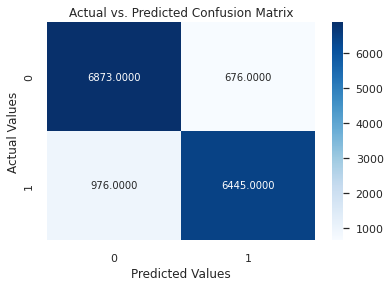

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# Test Data Set Prediction and Pipeline

RF works perfect

In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'month', 'campaign', 'poutcome', 'balance_group', 'week',
       'duration_group'],
      dtype='object')

In [ ]:
X_1.head()

,age,job,marital,education,balance,housing,loan,contact,month,campaign,poutcome,balance_group,week,duration_group
0,0.519481,5,0,1,0.074310,0,1,2,6,0.000000,3,2,0,2
1,0.428571,0,0,2,0.099995,1,0,2,5,0.016129,3,0,1,1
2,0.415584,1,0,0,0.077969,0,1,0,7,0.048387,3,1,2,2
3,0.116883,3,0,1,0.073466,1,0,0,1,0.000000,3,2,0,1
4,0.259740,6,2,0,0.131335,0,0,0,0,0.000000,3,0,1,2


In [ ]:
X_1.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'month',
 'campaign',
 'poutcome',
 'balance_group',
 'week',
 'duration_group']

In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
def min_max(data):
  scaler = MinMaxScaler()
  list_1 = ["age","balance","campaign"]
  data[list_1] = scaler.fit_transform(data[list_1])
  return data

In [ ]:
def groups(data):
  def week(day):
    if day<8:
        return 'Week1'
    elif day<15:
        return 'Week2'
    elif day<22:
        return 'Week3'
    else:
        return 'Week4'
  data['week']=data['day'].map(week)
  def call_time(duration):
    if duration<=1:
      return 'less than 1min'
    elif duration<=3:
      return '1-3 min'
    elif duration<=10:
      return '3-10 min'
    else:
       return 'more than 10 min'
  data['duration_group']=data['duration'].map(call_time)
  def bal_group(balance):
    if balance<25:
        return 'low_bal'
    elif balance<500:
        return 'medium_bal'
    elif balance<2000:
        return 'high_bal'
    else:
        return 'very_high_bal'
  data["balance_group"] = data["balance"].map(bal_group)
  return data

In [ ]:
def replace_encoding(data):
  data.job = data.job.replace("blue-collar",0).replace("management",1).replace("technician",2).replace("admin.",3).replace("services",4).replace("retired",5).replace("self-employed",6).replace("entrepreneur",7).replace("unemployed",8).replace("housemaid",9).replace("student",10).replace("unknown",11)
  data.marital = data.marital.replace("married",0).replace("single",1).replace("divorced",2)
  data.education = data.education.replace("tertiary",0).replace("secondary",1).replace("primary",2).replace("unknown",3)
  data["housing"] = data["housing"].replace("no",0).replace("yes",1) 
  data["loan"] = data["loan"].replace("no",0).replace("yes",1)
  data.month = data.month.replace("jan",0).replace("feb",1).replace("mar",2).replace("apr",3).replace("may",4).replace("jun",5).replace("jul",6).replace("aug",7).replace("sep",8).replace("oct",9).replace("nov",10).replace("dec",11)
  data.contact = data.contact.replace("cellular",0).replace("telephone",1).replace("others",2)
  data.poutcome = data.poutcome.replace("success",0).replace("failure",1).replace("other",2).replace("unknown",3)
  data.week = data.week.replace("Week1",0).replace("Week2",1).replace("Week3",2).replace("Week4",3)
  data.balance_group = data.balance_group.replace("very_high_bal",0).replace("high_bal",1).replace("medium_bal",2).replace("low_bal",3)
  data.duration_group = data.duration_group.replace("less than 1min",0).replace("1-3 min",1).replace("3-10 min",2).replace("more than 10 min",3)
  return data

In [ ]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
min_max(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.306667,management,married,tertiary,no,0.118659,yes,no,unknown,15,may,71,0.017544,-1,0,unknown
1,0.546667,blue-collar,married,primary,no,0.048744,yes,no,cellular,5,feb,43,0.000000,261,3,failure
2,0.253333,housemaid,married,primary,no,0.047583,yes,no,cellular,24,jul,347,0.070175,-1,0,unknown
3,0.306667,blue-collar,divorced,secondary,no,0.046528,yes,no,cellular,18,nov,103,0.087719,-1,0,unknown
4,0.120000,student,single,tertiary,no,0.104690,yes,no,cellular,15,may,258,0.017544,343,4,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.400000,self-employed,married,tertiary,no,0.084153,no,no,cellular,13,aug,371,0.017544,-1,0,unknown
11299,0.426667,blue-collar,married,primary,no,0.093607,yes,no,cellular,20,apr,122,0.017544,-1,0,unknown
11300,0.440000,self-employed,single,tertiary,no,0.047583,yes,no,cellular,11,jul,139,0.017544,-1,0,unknown
11301,0.146667,blue-collar,married,secondary,no,0.049870,yes,no,cellular,11,may,333,0.000000,-1,0,unknown


In [ ]:
groups(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,week,duration_group,balance_group
0,0.306667,management,married,tertiary,no,0.118659,yes,no,unknown,15,may,71,0.017544,-1,0,unknown,Week3,more than 10 min,low_bal
1,0.546667,blue-collar,married,primary,no,0.048744,yes,no,cellular,5,feb,43,0.000000,261,3,failure,Week1,more than 10 min,low_bal
2,0.253333,housemaid,married,primary,no,0.047583,yes,no,cellular,24,jul,347,0.070175,-1,0,unknown,Week4,more than 10 min,low_bal
3,0.306667,blue-collar,divorced,secondary,no,0.046528,yes,no,cellular,18,nov,103,0.087719,-1,0,unknown,Week3,more than 10 min,low_bal
4,0.120000,student,single,tertiary,no,0.104690,yes,no,cellular,15,may,258,0.017544,343,4,other,Week3,more than 10 min,low_bal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.400000,self-employed,married,tertiary,no,0.084153,no,no,cellular,13,aug,371,0.017544,-1,0,unknown,Week2,more than 10 min,low_bal
11299,0.426667,blue-collar,married,primary,no,0.093607,yes,no,cellular,20,apr,122,0.017544,-1,0,unknown,Week3,more than 10 min,low_bal
11300,0.440000,self-employed,single,tertiary,no,0.047583,yes,no,cellular,11,jul,139,0.017544,-1,0,unknown,Week2,more than 10 min,low_bal
11301,0.146667,blue-collar,married,secondary,no,0.049870,yes,no,cellular,11,may,333,0.000000,-1,0,unknown,Week2,more than 10 min,low_bal


In [ ]:
replace_encoding(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,week,duration_group,balance_group
0,0.306667,1,0,0,no,0.118659,1,0,unknown,15,4,71,0.017544,-1,0,3,2,3,3
1,0.546667,0,0,2,no,0.048744,1,0,0,5,1,43,0.000000,261,3,1,0,3,3
2,0.253333,9,0,2,no,0.047583,1,0,0,24,6,347,0.070175,-1,0,3,3,3,3
3,0.306667,0,2,1,no,0.046528,1,0,0,18,10,103,0.087719,-1,0,3,2,3,3
4,0.120000,10,1,0,no,0.104690,1,0,0,15,4,258,0.017544,343,4,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.400000,6,0,0,no,0.084153,0,0,0,13,7,371,0.017544,-1,0,3,1,3,3
11299,0.426667,0,0,2,no,0.093607,1,0,0,20,3,122,0.017544,-1,0,3,2,3,3
11300,0.440000,6,1,0,no,0.047583,1,0,0,11,6,139,0.017544,-1,0,3,1,3,3
11301,0.146667,0,0,1,no,0.049870,1,0,0,11,4,333,0.000000,-1,0,3,1,3,3


In [ ]:

# list9 = ['default',
# 'day',
# 'pdays',
# 'previous',"duration"]
# test = test.drop(list9, axis = 1)

In [ ]:
test.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'month', 'campaign', 'poutcome', 'week', 'duration_group',
       'balance_group'],
      dtype='object')

In [ ]:
submission["pred"] =unseen_predictions["class"]

In [ ]:
submission.to_csv("submission.csv", index = False)